In [30]:
import pickle

import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
import dill as pickle
import random
import sys
np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#print(os.getcwd())
from codes.experimentclasses.RigidEthanolPCA2 import RigidEthanolPCA2
from codes.otherfunctions.multirun import get_coeffs_reps_tangent
from codes.otherfunctions.multirun import get_grads_reps_pca2_tangent
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch_tangent
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.get_grads_tangent import get_grads_tangent
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
import matplotlib.pyplot as plt
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.geometer.RiemannianManifold import RiemannianManifold
from collections import Counter
from einops import rearrange

In [32]:


# with open(workingdirectory + '/untracked_data/embeddings/re_test_exp.pkl' ,
#          'rb') as file:
#      experiment = pickle.load(file)


#set parameters
n = 10000 #number of data points to simulate
nsel = 100 #number of points to analyze with lasso
#itermax = 1000 #maximum iterations per lasso run
tol = 1e-10 #convergence criteria for lasso
#lambdas = np.asarray([0,.01,.1,1,10,100], dtype = np.float16)#lambda values for lasso
#lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,1,11)]), dtype = np.float16)
n_neighbors = 1000 #number of neighbors in megaman
m = 3 #number of embedding dimensions (diffusion maps)
#diffusion_time = 1. #diffusion time controls gaussian kernel radius per gradients paper
diffusion_time = 0.05 #(yuchia suggestion)
dim = 2 #manifold dimension
dimnoise = 2
natoms = 9
cores = 3 #number of cores for parallel processing
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
ii = np.asarray([0,0,0,0,1,1,1,2]) # atom adjacencies for dihedral angle computation
jj = np.asarray([1,2,3,4,5,6,7,8])

#run experiment
atoms4 = np.asarray([[6,1,0,4],[4,0,2,8],[7,6,5,1],[3,0,2,4]],dtype = int)
nreps = 25
lambda_max = 1
max_search = 30

folder = workingdirectory + '/Figures/rigidethanol/' + now + 'n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(nreps)
os.mkdir(folder)

#src = workingdirectory + '/codes/experiments/rigidethanol_110120_nsel100_nreps25_var0.py'
#filenamescript = folder + '/script.py'
#copyfile(src, filenamescript)

new_MN = True
new_grad = True
savename = 'sammmmm'
savefolder = 'sammmmm'
loadfolder = 'sammmmm'
loadname = 'sammmmm'
if new_MN == True:
    experiment = RigidEthanolPCA2(dim, cor, var, ii, jj, cores, False, atoms4)
    experiment.M, experiment.Mpca, projector = experiment.generate_data(noise=False)
    experiment.q = m
    experiment.m = m
    experiment.dimnoise = dimnoise
    experiment.projector = projector
    experiment.Mpca.geom = experiment.Mpca.compute_geom(diffusion_time, n_neighbors)
    experiment.N = experiment.Mpca.get_embedding3(experiment.Mpca.geom, m, diffusion_time, dim)
    # with open(workingdirectory + '/untracked_data/embeddings/' + savefolder + '/' + savename + '.pkl' ,
    #          'wb') as output:
    #      pickle.dump(experiment, output, pickle.HIGHEST_PROTOCOL)

    

In [4]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/Desktop/rigidethanol_120220_samgl_n100_pall_nrep25results.pkl' ,
         'rb') as loader:
     results = pickle.load(loader)


In [261]:
results[0][1][0.0].shape

(100, 756, 3)

In [262]:
np.save('/Users/samsonkoelle/oneethfullnpy',results[0][1][0.0])

In [33]:
selected_points = np.asarray([6302, 6324, 8429, 3879, 5895, 7658, 7643, 8098, 6731, 3767, 4484,
       5507, 7613, 5278, 9692, 6092, 6269, 8746, 2945, 8898, 9333, 8130,
       3895, 2477, 2598, 5186, 4196, 9920, 5717, 3049, 8616, 9628, 8678,
        563, 8877, 3339, 9882, 7231, 5533,  854, 7098, 3043, 8465, 5558,
       8434, 4601,   42, 7451, 3789, 1472,  653, 7596, 9284,  808, 9126,
        228, 2881, 4208, 5541, 8894, 5084, 3694, 5423,  814, 6801, 3540,
       2774,  646, 8581, 5243, 6838, 4810, 2796, 6965, 9346, 6533, 2752,
        585, 8725, 5568, 8645, 7177,  637, 7786, 1723, 9707, 9380, 5364,
       9595, 2695, 1602, 3808, 1052, 4073, 5555, 6026,  360, 5309, 5415,
       7332])

In [34]:
from codes.otherfunctions.get_dictionaries import get_all_atoms_4

In [35]:
from codes.otherfunctions.get_grads import get_grads

In [36]:
nreps = 1
natoms = 9
itermax = 100
tol = 1e-14
atoms4,p = get_all_atoms_4(natoms)
experiment.p = p
experiment.atoms4 = atoms4
experiment.itermax = itermax
experiment.tol = tol
experiment.dnoise = dim
experiment.nreps = nreps
experiment.nsel = 5
#experiment.folder = folder
nsel = 100
replicates = {}
selected_points_save = np.zeros((nreps,nsel))
for i in range(1):
    selected_points = selected_points #np.random.choice(list(range(n)),nsel,replace = False)
    selected_points_save[i] = selected_points
    replicates[i] = Replicate()
    replicates[i].nsel = nsel
    replicates[i].selected_points = selected_points
    replicates[i].df_M,replicates[i].dg_M,replicates[i].dg_w ,replicates[i].dg_w_pca ,replicates[i].dgw_norm  = get_grads(experiment, experiment.Mpca, experiment.M, experiment.N, selected_points)
    #= experiment.get_betas_spam2(replicates[i].xtrain, replicates[i].ytrain, replicates[i].groups, lambdas, len(selected_points), n_embedding_coordinates, itermax, tol)


In [19]:
replicates[0].dg_w.shape

(100, 756, 252)

In [22]:
#results[0][1][0.03651740006917935]

In [40]:
replicate = replicates[0]
dg_M = np.swapaxes(replicate.dg_M,1,2)
df_M = replicate.df_M
gl_itermax = 5000
lambdas_start = [0.,.1]
max_search = 15
reg_l2 = 0.
card = 2
tol = 1e-14
learning_rate = 10.

In [41]:
from codes.flasso.GradientGroupLasso import GradientGroupLasso


In [43]:
GGL1 = GradientGroupLasso(dg_M, df_M, np.asarray([0.03651740006917935]), reg_l2, 500,learning_rate, tol, beta0_npm= None)
GGL1.fit()

0
lr 10.0
lr 5.0
lr 2.5
lr 1.25
1
lr 1.25
2
lr 1.25
3
lr 1.25
4
lr 1.25
5
lr 1.25
6
lr 1.25
7
lr 1.25
8
lr 1.25
9
lr 1.25
10
lr 1.25
11
lr 1.25
12
lr 1.25
13
lr 1.25
14
lr 1.25
15
lr 1.25
16
lr 1.25
17
lr 1.25
18
lr 1.25
19
lr 1.25
20
lr 1.25
21
lr 1.25
22
lr 1.25
23
lr 1.25
24
lr 1.25
25
lr 1.25
26
lr 1.25
27
lr 1.25
28
lr 1.25
29
lr 1.25
30
lr 1.25
31
lr 1.25
32
lr 1.25
33
lr 1.25
34
lr 1.25
35
lr 1.25
36
lr 1.25
37
lr 1.25
38
lr 1.25
39
lr 1.25
40
lr 1.25
41
lr 1.25
42
lr 1.25
43
lr 1.25
44
lr 1.25
45
lr 1.25
46
lr 1.25
47
lr 1.25
48
lr 1.25
49
lr 1.25
50
lr 1.25
51
lr 1.25
52
lr 1.25
53
lr 1.25
54
lr 1.25
55
lr 1.25
56
lr 1.25
57
lr 1.25
58
lr 1.25
59
lr 1.25
60
lr 1.25
61
lr 1.25
62
lr 1.25
63
lr 1.25
64
lr 1.25
65
lr 1.25
66
lr 1.25
67
lr 1.25
68
lr 1.25
69
lr 1.25
70
lr 1.25
71
lr 1.25
72
lr 1.25
73
lr 1.25
74
lr 1.25
75
lr 1.25
76
lr 1.25
77
lr 1.25
78
lr 1.25
79
lr 1.25
80
lr 1.25
81
lr 1.25
82
lr 1.25
83
lr 1.25
84
lr 1.25
85
lr 1.25
86
lr 1.25
87
lr 1.25
88
lr 1.25
89
lr 1.2

In [55]:
GGL1.lossresults[0.03651740006917935][-10:]

[0.1494801985105038,
 0.1494801933629361,
 0.14948018843100858,
 0.14948018369934524,
 0.14948017914292153,
 0.14948017472984026,
 0.1494801704245041,
 0.14948016619091048,
 0.14948016199579814,
 0.14948015781140273]

In [28]:
dg_M.max()

/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


nan

In [47]:
GGL1.fit_[-1]['beta']

0.08442043792649083

In [49]:
g1fast =  experiment.get_g_full_sub(experiment.M.data, np.asarray([2, 0, 5, 7]))
g2fast = experiment.get_g_full_sub(experiment.M.data, np.asarray([8,5,4,7]))#np.asarray([6, 4, 7, 8]))#np.asarray([2, 0, 6, 7]))

In [48]:
atoms4[np.where((np.linalg.norm(GGL1.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]]

array([[2, 0, 5, 7],
       [8, 5, 4, 7]])

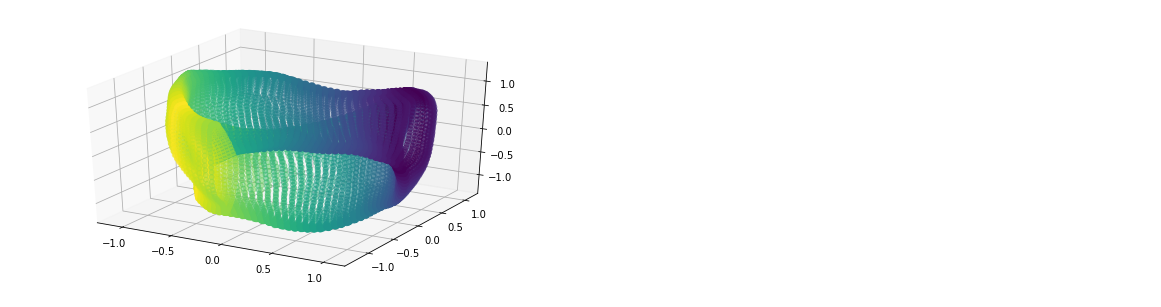

In [50]:
%matplotlib inline
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,1, figsize = (20,5))
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

axs[0].set_axis_off()
axs[1].set_axis_off()

ax = fig.add_subplot(1, 2, 1, projection='3d')

selected_points = list(range(10000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]
#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z, c=g1fast, s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)

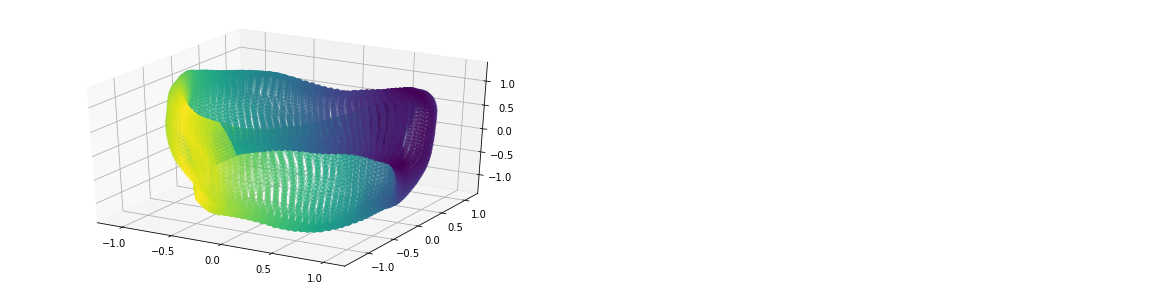

In [51]:
%matplotlib inline
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,1, figsize = (20,5))
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

axs[0].set_axis_off()
axs[1].set_axis_off()

ax = fig.add_subplot(1, 2, 1, projection='3d')

selected_points = list(range(10000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]
#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z, c=g2fast, s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)

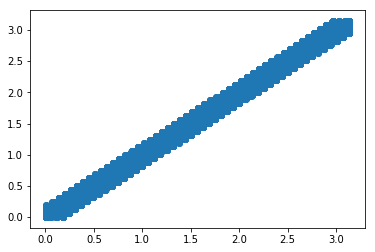

In [52]:
plt.scatter(g1fast, g2fast)

In [56]:
GGL5k = GradientGroupLasso(dg_M, df_M, np.asarray([0.03651740006917935]), reg_l2, 5000,learning_rate, tol, beta0_npm= None)
GGL5k.fit()

0
lr 10.0
lr 5.0
lr 2.5
lr 1.25
1
lr 1.25
2
lr 1.25
3
lr 1.25
4
lr 1.25
5
lr 1.25
6
lr 1.25
7
lr 1.25
8
lr 1.25
9
lr 1.25
10
lr 1.25
11
lr 1.25
12
lr 1.25
13
lr 1.25
14
lr 1.25
15
lr 1.25
16
lr 1.25
17
lr 1.25
18
lr 1.25
19
lr 1.25
20
lr 1.25
21
lr 1.25
22
lr 1.25
23
lr 1.25
24
lr 1.25
25
lr 1.25
26
lr 1.25
27
lr 1.25
28
lr 1.25
29
lr 1.25
30
lr 1.25
31
lr 1.25
32
lr 1.25
33
lr 1.25
34
lr 1.25
35
lr 1.25
36
lr 1.25
37
lr 1.25
38
lr 1.25
39
lr 1.25
40
lr 1.25
41
lr 1.25
42
lr 1.25
43
lr 1.25
44
lr 1.25
45
lr 1.25
46
lr 1.25
47
lr 1.25
48
lr 1.25
49
lr 1.25
50
lr 1.25
51
lr 1.25
52
lr 1.25
53
lr 1.25
54
lr 1.25
55
lr 1.25
56
lr 1.25
57
lr 1.25
58
lr 1.25
59
lr 1.25
60
lr 1.25
61
lr 1.25
62
lr 1.25
63
lr 1.25
64
lr 1.25
65
lr 1.25
66
lr 1.25
67
lr 1.25
68
lr 1.25
69
lr 1.25
70
lr 1.25
71
lr 1.25
72
lr 1.25
73
lr 1.25
74
lr 1.25
75
lr 1.25
76
lr 1.25
77
lr 1.25
78
lr 1.25
79
lr 1.25
80
lr 1.25
81
lr 1.25
82
lr 1.25
83
lr 1.25
84
lr 1.25
85
lr 1.25
86
lr 1.25
87
lr 1.25
88
lr 1.25
89
lr 1.2

lr 1.25
691
lr 1.25
692
lr 1.25
693
lr 1.25
694
lr 1.25
695
lr 1.25
696
lr 1.25
697
lr 1.25
698
lr 1.25
699
lr 1.25
700
lr 1.25
701
lr 1.25
702
lr 1.25
703
lr 1.25
704
lr 1.25
705
lr 1.25
706
lr 1.25
707
lr 1.25
708
lr 1.25
709
lr 1.25
710
lr 1.25
711
lr 1.25
712
lr 1.25
713
lr 1.25
714
lr 1.25
715
lr 1.25
716
lr 1.25
717
lr 1.25
718
lr 1.25
719
lr 1.25
720
lr 1.25
721
lr 1.25
722
lr 1.25
723
lr 1.25
724
lr 1.25
725
lr 1.25
726
lr 1.25
727
lr 1.25
728
lr 1.25
729
lr 1.25
730
lr 1.25
731
lr 1.25
732
lr 1.25
733
lr 1.25
734
lr 1.25
735
lr 1.25
736
lr 1.25
737
lr 1.25
738
lr 1.25
739
lr 1.25
740
lr 1.25
741
lr 1.25
742
lr 1.25
743
lr 1.25
744
lr 1.25
745
lr 1.25
746
lr 1.25
747
lr 1.25
748
lr 1.25
749
lr 1.25
750
lr 1.25
751
lr 1.25
752
lr 1.25
753
lr 1.25
754
lr 1.25
755
lr 1.25
756
lr 1.25
757
lr 1.25
758
lr 1.25
759
lr 1.25
760
lr 1.25
761
lr 1.25
762
lr 1.25
763
lr 1.25
764
lr 1.25
765
lr 1.25
766
lr 1.25
767
lr 1.25
768
lr 1.25
769
lr 1.25
770
lr 1.25
771
lr 1.25
772
lr 1.25
773
lr 1

lr 1.25
1345
lr 1.25
1346
lr 1.25
1347
lr 1.25
1348
lr 1.25
1349
lr 1.25
1350
lr 1.25
1351
lr 1.25
1352
lr 1.25
1353
lr 1.25
1354
lr 1.25
1355
lr 1.25
1356
lr 1.25
1357
lr 1.25
1358
lr 1.25
1359
lr 1.25
1360
lr 1.25
1361
lr 1.25
1362
lr 1.25
1363
lr 1.25
1364
lr 1.25
1365
lr 1.25
1366
lr 1.25
1367
lr 1.25
1368
lr 1.25
1369
lr 1.25
1370
lr 1.25
1371
lr 1.25
1372
lr 1.25
1373
lr 1.25
1374
lr 1.25
1375
lr 1.25
1376
lr 1.25
1377
lr 1.25
1378
lr 1.25
1379
lr 1.25
1380
lr 1.25
1381
lr 1.25
1382
lr 1.25
1383
lr 1.25
1384
lr 1.25
1385
lr 1.25
1386
lr 1.25
1387
lr 1.25
1388
lr 1.25
1389
lr 1.25
1390
lr 1.25
1391
lr 1.25
1392
lr 1.25
1393
lr 1.25
1394
lr 1.25
1395
lr 1.25
1396
lr 1.25
1397
lr 1.25
1398
lr 1.25
1399
lr 1.25
1400
lr 1.25
1401
lr 1.25
1402
lr 1.25
1403
lr 1.25
1404
lr 1.25
1405
lr 1.25
1406
lr 1.25
1407
lr 1.25
1408
lr 1.25
1409
lr 1.25
1410
lr 1.25
1411
lr 1.25
1412
lr 1.25
1413
lr 1.25
1414
lr 1.25
1415
lr 1.25
1416
lr 1.25
1417
lr 1.25
1418
lr 1.25
1419
lr 1.25
1420
lr 1.25
1421

lr 1.25
1976
lr 1.25
1977
lr 1.25
1978
lr 1.25
1979
lr 1.25
1980
lr 1.25
1981
lr 1.25
1982
lr 1.25
1983
lr 1.25
1984
lr 1.25
1985
lr 1.25
1986
lr 1.25
1987
lr 1.25
1988
lr 1.25
1989
lr 1.25
1990
lr 1.25
1991
lr 1.25
1992
lr 1.25
1993
lr 1.25
1994
lr 1.25
1995
lr 1.25
1996
lr 1.25
1997
lr 1.25
1998
lr 1.25
1999
lr 1.25
2000
lr 1.25
2001
lr 1.25
2002
lr 1.25
2003
lr 1.25
2004
lr 1.25
2005
lr 1.25
2006
lr 1.25
2007
lr 1.25
2008
lr 1.25
2009
lr 1.25
2010
lr 1.25
2011
lr 1.25
2012
lr 1.25
2013
lr 1.25
2014
lr 1.25
2015
lr 1.25
2016
lr 1.25
2017
lr 1.25
2018
lr 1.25
2019
lr 1.25
2020
lr 1.25
2021
lr 1.25
2022
lr 1.25
2023
lr 1.25
2024
lr 1.25
2025
lr 1.25
2026
lr 1.25
2027
lr 1.25
2028
lr 1.25
2029
lr 1.25
2030
lr 1.25
2031
lr 1.25
2032
lr 1.25
2033
lr 1.25
2034
lr 1.25
2035
lr 1.25
2036
lr 1.25
2037
lr 1.25
2038
lr 1.25
2039
lr 1.25
2040
lr 1.25
2041
lr 1.25
2042
lr 1.25
2043
lr 1.25
2044
lr 1.25
2045
lr 1.25
2046
lr 1.25
2047
lr 1.25
2048
lr 1.25
2049
lr 1.25
2050
lr 1.25
2051
lr 1.25
2052

lr 1.25
2608
lr 1.25
2609
lr 1.25
2610
lr 1.25
2611
lr 1.25
2612
lr 1.25
2613
lr 1.25
2614
lr 1.25
2615
lr 1.25
2616
lr 1.25
2617
lr 1.25
2618
lr 1.25
2619
lr 1.25
2620
lr 1.25
2621
lr 1.25
2622
lr 1.25
2623
lr 1.25
2624
lr 1.25
2625
lr 1.25
2626
lr 1.25
2627
lr 1.25
2628
lr 1.25
2629
lr 1.25
2630
lr 1.25
2631
lr 1.25
2632
lr 1.25
2633
lr 1.25
2634
lr 1.25
2635
lr 1.25
2636
lr 1.25
2637
lr 1.25
2638
lr 1.25
2639
lr 1.25
2640
lr 1.25
2641
lr 1.25
2642
lr 1.25
2643
lr 1.25
2644
lr 1.25
lr 0.625
2645
lr 0.625
2646
lr 0.625
2647
lr 0.625
2648
lr 0.625
2649
lr 0.625
2650
lr 0.625
2651
lr 0.625
2652
lr 0.625
2653
lr 0.625
2654
lr 0.625
2655
lr 0.625
2656
lr 0.625
2657
lr 0.625
2658
lr 0.625
2659
lr 0.625
2660
lr 0.625
2661
lr 0.625
2662
lr 0.625
2663
lr 0.625
2664
lr 0.625
2665
lr 0.625
2666
lr 0.625
2667
lr 0.625
2668
lr 0.625
2669
lr 0.625
2670
lr 0.625
2671
lr 0.625
2672
lr 0.625
2673
lr 0.625
2674
lr 0.625
2675
lr 0.625
2676
lr 0.625
2677
lr 0.625
2678
lr 0.625
2679
lr 0.625
2680
lr 0.62

lr 4.547473508864641e-12
3022
lr 4.547473508864641e-12
3023
lr 4.547473508864641e-12
3024
lr 4.547473508864641e-12
3025
lr 4.547473508864641e-12
3026
lr 4.547473508864641e-12
3027
lr 4.547473508864641e-12
3028
lr 4.547473508864641e-12
3029
lr 4.547473508864641e-12
3030
lr 4.547473508864641e-12
3031
lr 4.547473508864641e-12
3032
lr 4.547473508864641e-12
3033
lr 4.547473508864641e-12
3034
lr 4.547473508864641e-12
3035
lr 4.547473508864641e-12
3036
lr 4.547473508864641e-12
3037
lr 4.547473508864641e-12
3038
lr 4.547473508864641e-12
3039
lr 4.547473508864641e-12
3040
lr 4.547473508864641e-12
3041
lr 4.547473508864641e-12
3042
lr 4.547473508864641e-12
3043
lr 4.547473508864641e-12
3044
lr 4.547473508864641e-12
3045
lr 4.547473508864641e-12
3046
lr 4.547473508864641e-12
3047
lr 4.547473508864641e-12
3048
lr 4.547473508864641e-12
3049
lr 4.547473508864641e-12
3050
lr 4.547473508864641e-12
3051
lr 4.547473508864641e-12
3052
lr 4.547473508864641e-12
3053
lr 4.547473508864641e-12
3054
lr 4.54747

lr 5.684341886080801e-13
3293
lr 5.684341886080801e-13
3294
lr 5.684341886080801e-13
3295
lr 5.684341886080801e-13
3296
lr 5.684341886080801e-13
3297
lr 5.684341886080801e-13
3298
lr 5.684341886080801e-13
3299
lr 5.684341886080801e-13
3300
lr 5.684341886080801e-13
3301
lr 5.684341886080801e-13
3302
lr 5.684341886080801e-13
3303
lr 5.684341886080801e-13
3304
lr 5.684341886080801e-13
3305
lr 5.684341886080801e-13
3306
lr 5.684341886080801e-13
3307
lr 5.684341886080801e-13
3308
lr 5.684341886080801e-13
3309
lr 5.684341886080801e-13
3310
lr 5.684341886080801e-13
3311
lr 5.684341886080801e-13
3312
lr 5.684341886080801e-13
3313
lr 5.684341886080801e-13
3314
lr 5.684341886080801e-13
3315
lr 5.684341886080801e-13
3316
lr 5.684341886080801e-13
3317
lr 5.684341886080801e-13
3318
lr 5.684341886080801e-13
3319
lr 5.684341886080801e-13
3320
lr 5.684341886080801e-13
3321
lr 5.684341886080801e-13
3322
lr 5.684341886080801e-13
3323
lr 5.684341886080801e-13
3324
lr 5.684341886080801e-13
3325
lr 5.68434

lr 5.684341886080801e-13
3567
lr 5.684341886080801e-13
3568
lr 5.684341886080801e-13
3569
lr 5.684341886080801e-13
3570
lr 5.684341886080801e-13
3571
lr 5.684341886080801e-13
3572
lr 5.684341886080801e-13
3573
lr 5.684341886080801e-13
3574
lr 5.684341886080801e-13
3575
lr 5.684341886080801e-13
3576
lr 5.684341886080801e-13
3577
lr 5.684341886080801e-13
3578
lr 5.684341886080801e-13
3579
lr 5.684341886080801e-13
3580
lr 5.684341886080801e-13
3581
lr 5.684341886080801e-13
3582
lr 5.684341886080801e-13
3583
lr 5.684341886080801e-13
3584
lr 5.684341886080801e-13
3585
lr 5.684341886080801e-13
3586
lr 5.684341886080801e-13
3587
lr 5.684341886080801e-13
3588
lr 5.684341886080801e-13
3589
lr 5.684341886080801e-13
3590
lr 5.684341886080801e-13
3591
lr 5.684341886080801e-13
3592
lr 5.684341886080801e-13
3593
lr 5.684341886080801e-13
3594
lr 5.684341886080801e-13
3595
lr 5.684341886080801e-13
3596
lr 5.684341886080801e-13
3597
lr 5.684341886080801e-13
3598
lr 5.684341886080801e-13
3599
lr 5.68434

lr 2.8421709430404007e-13
3839
lr 2.8421709430404007e-13
3840
lr 2.8421709430404007e-13
3841
lr 2.8421709430404007e-13
3842
lr 2.8421709430404007e-13
3843
lr 2.8421709430404007e-13
3844
lr 2.8421709430404007e-13
3845
lr 2.8421709430404007e-13
3846
lr 2.8421709430404007e-13
3847
lr 2.8421709430404007e-13
3848
lr 2.8421709430404007e-13
3849
lr 2.8421709430404007e-13
3850
lr 2.8421709430404007e-13
3851
lr 2.8421709430404007e-13
3852
lr 2.8421709430404007e-13
3853
lr 2.8421709430404007e-13
3854
lr 2.8421709430404007e-13
3855
lr 2.8421709430404007e-13
3856
lr 2.8421709430404007e-13
3857
lr 2.8421709430404007e-13
3858
lr 2.8421709430404007e-13
3859
lr 2.8421709430404007e-13
3860
lr 2.8421709430404007e-13
3861
lr 2.8421709430404007e-13
3862
lr 2.8421709430404007e-13
3863
lr 2.8421709430404007e-13
3864
lr 2.8421709430404007e-13
3865
lr 2.8421709430404007e-13
3866
lr 2.8421709430404007e-13
3867
lr 2.8421709430404007e-13
3868
lr 2.8421709430404007e-13
3869
lr 2.8421709430404007e-13
3870
lr 2.842

lr 1.4210854715202004e-13
4104
lr 1.4210854715202004e-13
4105
lr 1.4210854715202004e-13
4106
lr 1.4210854715202004e-13
4107
lr 1.4210854715202004e-13
4108
lr 1.4210854715202004e-13
4109
lr 1.4210854715202004e-13
4110
lr 1.4210854715202004e-13
4111
lr 1.4210854715202004e-13
4112
lr 1.4210854715202004e-13
4113
lr 1.4210854715202004e-13
4114
lr 1.4210854715202004e-13
4115
lr 1.4210854715202004e-13
4116
lr 1.4210854715202004e-13
4117
lr 1.4210854715202004e-13
4118
lr 1.4210854715202004e-13
4119
lr 1.4210854715202004e-13
4120
lr 1.4210854715202004e-13
4121
lr 1.4210854715202004e-13
4122
lr 1.4210854715202004e-13
4123
lr 1.4210854715202004e-13
4124
lr 1.4210854715202004e-13
4125
lr 1.4210854715202004e-13
4126
lr 1.4210854715202004e-13
4127
lr 1.4210854715202004e-13
4128
lr 1.4210854715202004e-13
4129
lr 1.4210854715202004e-13
4130
lr 1.4210854715202004e-13
4131
lr 1.4210854715202004e-13
4132
lr 1.4210854715202004e-13
4133
lr 1.4210854715202004e-13
4134
lr 1.4210854715202004e-13
4135
lr 1.421

lr 1.4210854715202004e-13
4370
lr 1.4210854715202004e-13
4371
lr 1.4210854715202004e-13
4372
lr 1.4210854715202004e-13
4373
lr 1.4210854715202004e-13
4374
lr 1.4210854715202004e-13
4375
lr 1.4210854715202004e-13
4376
lr 1.4210854715202004e-13
4377
lr 1.4210854715202004e-13
4378
lr 1.4210854715202004e-13
4379
lr 1.4210854715202004e-13
4380
lr 1.4210854715202004e-13
4381
lr 1.4210854715202004e-13
4382
lr 1.4210854715202004e-13
4383
lr 1.4210854715202004e-13
4384
lr 1.4210854715202004e-13
4385
lr 1.4210854715202004e-13
4386
lr 1.4210854715202004e-13
4387
lr 1.4210854715202004e-13
4388
lr 1.4210854715202004e-13
4389
lr 1.4210854715202004e-13
4390
lr 1.4210854715202004e-13
4391
lr 1.4210854715202004e-13
4392
lr 1.4210854715202004e-13
4393
lr 1.4210854715202004e-13
4394
lr 1.4210854715202004e-13
4395
lr 1.4210854715202004e-13
4396
lr 1.4210854715202004e-13
4397
lr 1.4210854715202004e-13
4398
lr 1.4210854715202004e-13
4399
lr 1.4210854715202004e-13
4400
lr 1.4210854715202004e-13
4401
lr 1.421

lr 1.4210854715202004e-13
4636
lr 1.4210854715202004e-13
4637
lr 1.4210854715202004e-13
4638
lr 1.4210854715202004e-13
4639
lr 1.4210854715202004e-13
4640
lr 1.4210854715202004e-13
4641
lr 1.4210854715202004e-13
4642
lr 1.4210854715202004e-13
4643
lr 1.4210854715202004e-13
4644
lr 1.4210854715202004e-13
4645
lr 1.4210854715202004e-13
4646
lr 1.4210854715202004e-13
4647
lr 1.4210854715202004e-13
4648
lr 1.4210854715202004e-13
4649
lr 1.4210854715202004e-13
4650
lr 1.4210854715202004e-13
4651
lr 1.4210854715202004e-13
4652
lr 1.4210854715202004e-13
4653
lr 1.4210854715202004e-13
4654
lr 1.4210854715202004e-13
4655
lr 1.4210854715202004e-13
4656
lr 1.4210854715202004e-13
4657
lr 1.4210854715202004e-13
4658
lr 1.4210854715202004e-13
4659
lr 1.4210854715202004e-13
4660
lr 1.4210854715202004e-13
4661
lr 1.4210854715202004e-13
4662
lr 1.4210854715202004e-13
4663
lr 1.4210854715202004e-13
4664
lr 1.4210854715202004e-13
4665
lr 1.4210854715202004e-13
4666
lr 1.4210854715202004e-13
4667
lr 1.421

4900
lr 7.105427357601002e-14
4901
lr 7.105427357601002e-14
4902
lr 7.105427357601002e-14
4903
lr 7.105427357601002e-14
4904
lr 7.105427357601002e-14
4905
lr 7.105427357601002e-14
4906
lr 7.105427357601002e-14
4907
lr 7.105427357601002e-14
4908
lr 7.105427357601002e-14
4909
lr 7.105427357601002e-14
4910
lr 7.105427357601002e-14
4911
lr 7.105427357601002e-14
4912
lr 7.105427357601002e-14
4913
lr 7.105427357601002e-14
4914
lr 7.105427357601002e-14
4915
lr 7.105427357601002e-14
4916
lr 7.105427357601002e-14
4917
lr 7.105427357601002e-14
4918
lr 7.105427357601002e-14
4919
lr 7.105427357601002e-14
4920
lr 7.105427357601002e-14
4921
lr 7.105427357601002e-14
4922
lr 7.105427357601002e-14
4923
lr 7.105427357601002e-14
4924
lr 7.105427357601002e-14
4925
lr 7.105427357601002e-14
4926
lr 7.105427357601002e-14
4927
lr 7.105427357601002e-14
4928
lr 7.105427357601002e-14
4929
lr 7.105427357601002e-14
4930
lr 7.105427357601002e-14
4931
lr 7.105427357601002e-14
4932
lr 7.105427357601002e-14
4933
lr 7.

In [59]:
atoms4[np.where((np.linalg.norm(GGL5k.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]]

array([[2, 0, 5, 7],
       [8, 5, 4, 7]])

In [100]:
np.where((np.linalg.norm(GGL5k.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]

array([187, 740])

In [63]:
GGL5k.lossresults[0.03651740006917935][-10:]

[0.14948023277496877,
 0.149480232844281,
 0.149480232913566,
 0.14948023298282373,
 0.1494802330520542,
 0.14948023312125755,
 0.1494802331904337,
 0.14948023325958257,
 0.14948023332870428,
 0.1494802333977988]

In [62]:
GGL1.lossresults[0.03651740006917935][-10:]

[0.1494801985105038,
 0.1494801933629361,
 0.14948018843100858,
 0.14948018369934524,
 0.14948017914292153,
 0.14948017472984026,
 0.1494801704245041,
 0.14948016619091048,
 0.14948016199579814,
 0.14948015781140273]

In [65]:
np.asarray(GGL5k.lossresults[0.03651740006917935]).argmin()

2916

In [66]:
GGL5k.lossresults[0.03651740006917935][2916]

0.14948006606350192

In [67]:
atoms4[np.where((np.linalg.norm(GGL5k.fit_[2916]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]]

IndexError: list index out of range

In [70]:
len(GGL5k.fit_)

1

In [71]:
GGL2916 = GradientGroupLasso(dg_M, df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGL2916.fit()

0
lr 10.0
lr 5.0
lr 2.5
lr 1.25
1
lr 1.25
2
lr 1.25
3
lr 1.25
4
lr 1.25
5
lr 1.25
6
lr 1.25
7
lr 1.25
8
lr 1.25
9
lr 1.25
10
lr 1.25
11
lr 1.25
12
lr 1.25
13
lr 1.25
14
lr 1.25
15
lr 1.25
16
lr 1.25
17
lr 1.25
18
lr 1.25
19
lr 1.25
20
lr 1.25
21
lr 1.25
22
lr 1.25
23
lr 1.25
24
lr 1.25
25
lr 1.25
26
lr 1.25
27
lr 1.25
28
lr 1.25
29
lr 1.25
30
lr 1.25
31
lr 1.25
32
lr 1.25
33
lr 1.25
34
lr 1.25
35
lr 1.25
36
lr 1.25
37
lr 1.25
38
lr 1.25
39
lr 1.25
40
lr 1.25
41
lr 1.25
42
lr 1.25
43
lr 1.25
44
lr 1.25
45
lr 1.25
46
lr 1.25
47
lr 1.25
48
lr 1.25
49
lr 1.25
50
lr 1.25
51
lr 1.25
52
lr 1.25
53
lr 1.25
54
lr 1.25
55
lr 1.25
56
lr 1.25
57
lr 1.25
58
lr 1.25
59
lr 1.25
60
lr 1.25
61
lr 1.25
62
lr 1.25
63
lr 1.25
64
lr 1.25
65
lr 1.25
66
lr 1.25
67
lr 1.25
68
lr 1.25
69
lr 1.25
70
lr 1.25
71
lr 1.25
72
lr 1.25
73
lr 1.25
74
lr 1.25
75
lr 1.25
76
lr 1.25
77
lr 1.25
78
lr 1.25
79
lr 1.25
80
lr 1.25
81
lr 1.25
82
lr 1.25
83
lr 1.25
84
lr 1.25
85
lr 1.25
86
lr 1.25
87
lr 1.25
88
lr 1.25
89
lr 1.2

lr 1.25
691
lr 1.25
692
lr 1.25
693
lr 1.25
694
lr 1.25
695
lr 1.25
696
lr 1.25
697
lr 1.25
698
lr 1.25
699
lr 1.25
700
lr 1.25
701
lr 1.25
702
lr 1.25
703
lr 1.25
704
lr 1.25
705
lr 1.25
706
lr 1.25
707
lr 1.25
708
lr 1.25
709
lr 1.25
710
lr 1.25
711
lr 1.25
712
lr 1.25
713
lr 1.25
714
lr 1.25
715
lr 1.25
716
lr 1.25
717
lr 1.25
718
lr 1.25
719
lr 1.25
720
lr 1.25
721
lr 1.25
722
lr 1.25
723
lr 1.25
724
lr 1.25
725
lr 1.25
726
lr 1.25
727
lr 1.25
728
lr 1.25
729
lr 1.25
730
lr 1.25
731
lr 1.25
732
lr 1.25
733
lr 1.25
734
lr 1.25
735
lr 1.25
736
lr 1.25
737
lr 1.25
738
lr 1.25
739
lr 1.25
740
lr 1.25
741
lr 1.25
742
lr 1.25
743
lr 1.25
744
lr 1.25
745
lr 1.25
746
lr 1.25
747
lr 1.25
748
lr 1.25
749
lr 1.25
750
lr 1.25
751
lr 1.25
752
lr 1.25
753
lr 1.25
754
lr 1.25
755
lr 1.25
756
lr 1.25
757
lr 1.25
758
lr 1.25
759
lr 1.25
760
lr 1.25
761
lr 1.25
762
lr 1.25
763
lr 1.25
764
lr 1.25
765
lr 1.25
766
lr 1.25
767
lr 1.25
768
lr 1.25
769
lr 1.25
770
lr 1.25
771
lr 1.25
772
lr 1.25
773
lr 1

lr 1.25
1345
lr 1.25
1346
lr 1.25
1347
lr 1.25
1348
lr 1.25
1349
lr 1.25
1350
lr 1.25
1351
lr 1.25
1352
lr 1.25
1353
lr 1.25
1354
lr 1.25
1355
lr 1.25
1356
lr 1.25
1357
lr 1.25
1358
lr 1.25
1359
lr 1.25
1360
lr 1.25
1361
lr 1.25
1362
lr 1.25
1363
lr 1.25
1364
lr 1.25
1365
lr 1.25
1366
lr 1.25
1367
lr 1.25
1368
lr 1.25
1369
lr 1.25
1370
lr 1.25
1371
lr 1.25
1372
lr 1.25
1373
lr 1.25
1374
lr 1.25
1375
lr 1.25
1376
lr 1.25
1377
lr 1.25
1378
lr 1.25
1379
lr 1.25
1380
lr 1.25
1381
lr 1.25
1382
lr 1.25
1383
lr 1.25
1384
lr 1.25
1385
lr 1.25
1386
lr 1.25
1387
lr 1.25
1388
lr 1.25
1389
lr 1.25
1390
lr 1.25
1391
lr 1.25
1392
lr 1.25
1393
lr 1.25
1394
lr 1.25
1395
lr 1.25
1396
lr 1.25
1397
lr 1.25
1398
lr 1.25
1399
lr 1.25
1400
lr 1.25
1401
lr 1.25
1402
lr 1.25
1403
lr 1.25
1404
lr 1.25
1405
lr 1.25
1406
lr 1.25
1407
lr 1.25
1408
lr 1.25
1409
lr 1.25
1410
lr 1.25
1411
lr 1.25
1412
lr 1.25
1413
lr 1.25
1414
lr 1.25
1415
lr 1.25
1416
lr 1.25
1417
lr 1.25
1418
lr 1.25
1419
lr 1.25
1420
lr 1.25
1421

lr 1.25
1976
lr 1.25
1977
lr 1.25
1978
lr 1.25
1979
lr 1.25
1980
lr 1.25
1981
lr 1.25
1982
lr 1.25
1983
lr 1.25
1984
lr 1.25
1985
lr 1.25
1986
lr 1.25
1987
lr 1.25
1988
lr 1.25
1989
lr 1.25
1990
lr 1.25
1991
lr 1.25
1992
lr 1.25
1993
lr 1.25
1994
lr 1.25
1995
lr 1.25
1996
lr 1.25
1997
lr 1.25
1998
lr 1.25
1999
lr 1.25
2000
lr 1.25
2001
lr 1.25
2002
lr 1.25
2003
lr 1.25
2004
lr 1.25
2005
lr 1.25
2006
lr 1.25
2007
lr 1.25
2008
lr 1.25
2009
lr 1.25
2010
lr 1.25
2011
lr 1.25
2012
lr 1.25
2013
lr 1.25
2014
lr 1.25
2015
lr 1.25
2016
lr 1.25
2017
lr 1.25
2018
lr 1.25
2019
lr 1.25
2020
lr 1.25
2021
lr 1.25
2022
lr 1.25
2023
lr 1.25
2024
lr 1.25
2025
lr 1.25
2026
lr 1.25
2027
lr 1.25
2028
lr 1.25
2029
lr 1.25
2030
lr 1.25
2031
lr 1.25
2032
lr 1.25
2033
lr 1.25
2034
lr 1.25
2035
lr 1.25
2036
lr 1.25
2037
lr 1.25
2038
lr 1.25
2039
lr 1.25
2040
lr 1.25
2041
lr 1.25
2042
lr 1.25
2043
lr 1.25
2044
lr 1.25
2045
lr 1.25
2046
lr 1.25
2047
lr 1.25
2048
lr 1.25
2049
lr 1.25
2050
lr 1.25
2051
lr 1.25
2052

lr 0.625
2569
lr 0.625
2570
lr 0.625
2571
lr 0.625
2572
lr 0.625
2573
lr 0.625
2574
lr 0.625
2575
lr 0.625
2576
lr 0.625
2577
lr 0.625
2578
lr 0.625
2579
lr 0.625
2580
lr 0.625
2581
lr 0.625
2582
lr 0.625
2583
lr 0.625
2584
lr 0.625
2585
lr 0.625
2586
lr 0.625
2587
lr 0.625
2588
lr 0.625
2589
lr 0.625
2590
lr 0.625
2591
lr 0.625
2592
lr 0.625
2593
lr 0.625
2594
lr 0.625
2595
lr 0.625
2596
lr 0.625
2597
lr 0.625
2598
lr 0.625
2599
lr 0.625
2600
lr 0.625
2601
lr 0.625
2602
lr 0.625
2603
lr 0.625
2604
lr 0.625
2605
lr 0.625
2606
lr 0.625
2607
lr 0.625
2608
lr 0.625
2609
lr 0.625
2610
lr 0.625
2611
lr 0.625
2612
lr 0.625
2613
lr 0.625
2614
lr 0.625
2615
lr 0.625
2616
lr 0.625
2617
lr 0.625
2618
lr 0.625
2619
lr 0.625
2620
lr 0.625
2621
lr 0.625
2622
lr 0.625
2623
lr 0.625
2624
lr 0.625
2625
lr 0.625
2626
lr 0.625
2627
lr 0.625
2628
lr 0.625
2629
lr 0.625
2630
lr 0.625
2631
lr 0.625
2632
lr 0.625
2633
lr 0.625
2634
lr 0.625
2635
lr 0.625
2636
lr 0.625
2637
lr 0.625
2638
lr 0.625
2639
lr 0.6

In [73]:
GGL2916.lossresults[0.03651740006917935][-10:]

[0.14948006616498422,
 0.14948006617385387,
 0.14948006618306917,
 0.14948006619262655,
 0.14948006620252216,
 0.14948006621275217,
 0.14948006622331278,
 0.14948006623419985,
 0.14948006624540938,
 0.14948006625693722]

In [74]:
atoms4[np.where((np.linalg.norm(GGL2916.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]]

array([[2, 0, 5, 7],
       [8, 5, 4, 7]])

In [78]:
import seaborn as sns

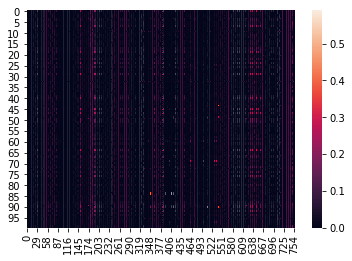

In [79]:
sns.heatmap(np.linalg.norm(dg_M, axis = 1))

In [83]:
total_load = (np.linalg.norm(dg_M, axis = 1)**2).sum(axis = 0)

In [88]:
total_load[566]

0.9453331063944068

In [101]:
total_load[[187, 740]]

array([0.82887238, 0.82196366])

In [96]:
atoms4[14]

array([5, 1, 0, 2])

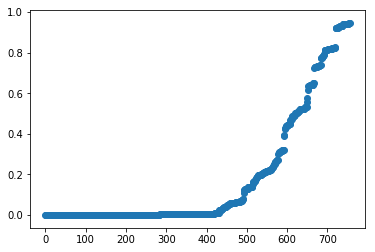

In [90]:
plt.scatter(list(range(756)),total_load[ total_load.argsort()])

In [ ]:
total_load

In [99]:
(np.linalg.norm(dg_M, axis = 1)**2)[:,14]

array([0.00582638, 0.00531248, 0.00582201, 0.0053646 , 0.00552214,
       0.00508844, 0.00511673, 0.00567211, 0.00524236, 0.00523379,
       0.00523375, 0.00535505, 0.00539944, 0.00506661, 0.00556543,
       0.00551928, 0.00524666, 0.00510072, 0.0052628 , 0.00566078,
       0.00518987, 0.00502252, 0.00561849, 0.00532676, 0.00583606,
       0.00513061, 0.00558369, 0.00538567, 0.00525895, 0.0057882 ,
       0.00522292, 0.00527694, 0.00514964, 0.00520254, 0.00520889,
       0.00520599, 0.0054308 , 0.00524769, 0.00497884, 0.005224  ,
       0.00585246, 0.00522649, 0.005006  , 0.0049943 , 0.00565707,
       0.00571081, 0.00518102, 0.0056744 , 0.00552093, 0.00524852,
       0.00534465, 0.00559726, 0.00542612, 0.00550592, 0.00520415,
       0.00527902, 0.00544649, 0.00544816, 0.00496188, 0.00543978,
       0.00326578, 0.00561412, 0.00504798, 0.0054281 , 0.00600857,
       0.00519761, 0.00534452, 0.00526392, 0.0051648 , 0.00496606,
       0.00519045, 0.00522   , 0.00569406, 0.00522817, 0.00526

In [ ]:
dg_M.s

In [97]:
total_load[14]

0.5335117167561064

In [89]:
atoms4[total_load.argsort()[-10:]]

array([[8, 3, 2, 7],
       [8, 3, 2, 6],
       [1, 2, 4, 8],
       [1, 2, 3, 8],
       [8, 2, 0, 7],
       [8, 2, 0, 6],
       [8, 2, 0, 5],
       [1, 0, 2, 8],
       [3, 2, 4, 8],
       [8, 3, 2, 4]])

In [145]:
GGLsmall = GradientGroupLasso(dg_M[:,:,[14, 187, 740]], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLsmall.fit()

0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

808
lr 10.0
809
lr 10.0
810
lr 10.0
811
lr 10.0
812
lr 10.0
813
lr 10.0
814
lr 10.0
815
lr 10.0
816
lr 10.0
817
lr 10.0
818
lr 10.0
819
lr 10.0
820
lr 10.0
821
lr 10.0
822
lr 10.0
823
lr 10.0
824
lr 10.0
825
lr 10.0
826
lr 10.0
827
lr 10.0
828
lr 10.0
829
lr 10.0
830
lr 10.0
831
lr 10.0
832
lr 10.0
833
lr 10.0
834
lr 10.0
835
lr 10.0
836
lr 10.0
837
lr 10.0
838
lr 10.0
839
lr 10.0
840
lr 10.0
841
lr 10.0
842
lr 10.0
843
lr 10.0
844
lr 10.0
845
lr 10.0
846
lr 10.0
847
lr 10.0
848
lr 10.0
849
lr 10.0
850
lr 10.0
851
lr 10.0
852
lr 10.0
853
lr 10.0
854
lr 10.0
855
lr 10.0
856
lr 10.0
857
lr 10.0
858
lr 10.0
859
lr 10.0
860
lr 10.0
861
lr 10.0
862
lr 10.0
863
lr 10.0
864
lr 10.0
865
lr 10.0
866
lr 10.0
867
lr 10.0
868
lr 10.0
869
lr 10.0
870
lr 10.0
871
lr 10.0
872
lr 10.0
873
lr 10.0
874
lr 10.0
875
lr 10.0
876
lr 10.0
877
lr 10.0
878
lr 10.0
879
lr 10.0
880
lr 10.0
881
lr 10.0
882
lr 10.0
883
lr 10.0
884
lr 10.0
885
lr 10.0
886
lr 10.0
887
lr 10.0
888
lr 10.0
889
lr 10.0
890
lr 10.0
891


1503
lr 9.313225746154785e-09
1504
lr 9.313225746154785e-09
1505
lr 9.313225746154785e-09
lr 4.6566128730773926e-09
lr 2.3283064365386963e-09
lr 1.1641532182693481e-09
lr 5.820766091346741e-10
1506
lr 5.820766091346741e-10
1507
lr 5.820766091346741e-10
1508
lr 5.820766091346741e-10
1509
lr 5.820766091346741e-10
1510
lr 5.820766091346741e-10
1511
lr 5.820766091346741e-10
1512
lr 5.820766091346741e-10
1513
lr 5.820766091346741e-10
1514
lr 5.820766091346741e-10
1515
lr 5.820766091346741e-10
1516
lr 5.820766091346741e-10
1517
lr 5.820766091346741e-10
1518
lr 5.820766091346741e-10
1519
lr 5.820766091346741e-10
1520
lr 5.820766091346741e-10
1521
lr 5.820766091346741e-10
1522
lr 5.820766091346741e-10
1523
lr 5.820766091346741e-10
1524
lr 5.820766091346741e-10
1525
lr 5.820766091346741e-10
1526
lr 5.820766091346741e-10
1527
lr 5.820766091346741e-10
1528
lr 5.820766091346741e-10
1529
lr 5.820766091346741e-10
1530
lr 5.820766091346741e-10
1531
lr 5.820766091346741e-10
1532
lr 5.820766091346741e-

lr 4.547473508864641e-12
1875
lr 4.547473508864641e-12
1876
lr 4.547473508864641e-12
1877
lr 4.547473508864641e-12
1878
lr 4.547473508864641e-12
1879
lr 4.547473508864641e-12
1880
lr 4.547473508864641e-12
1881
lr 4.547473508864641e-12
1882
lr 4.547473508864641e-12
1883
lr 4.547473508864641e-12
1884
lr 4.547473508864641e-12
1885
lr 4.547473508864641e-12
1886
lr 4.547473508864641e-12
1887
lr 4.547473508864641e-12
1888
lr 4.547473508864641e-12
1889
lr 4.547473508864641e-12
1890
lr 4.547473508864641e-12
1891
lr 4.547473508864641e-12
1892
lr 4.547473508864641e-12
1893
lr 4.547473508864641e-12
1894
lr 4.547473508864641e-12
1895
lr 4.547473508864641e-12
1896
lr 4.547473508864641e-12
1897
lr 4.547473508864641e-12
1898
lr 4.547473508864641e-12
1899
lr 4.547473508864641e-12
1900
lr 4.547473508864641e-12
1901
lr 4.547473508864641e-12
1902
lr 4.547473508864641e-12
1903
lr 4.547473508864641e-12
1904
lr 4.547473508864641e-12
1905
lr 4.547473508864641e-12
1906
lr 4.547473508864641e-12
1907
lr 4.54747

lr 1.1368683772161603e-12
2260
lr 1.1368683772161603e-12
2261
lr 1.1368683772161603e-12
2262
lr 1.1368683772161603e-12
2263
lr 1.1368683772161603e-12
2264
lr 1.1368683772161603e-12
2265
lr 1.1368683772161603e-12
2266
lr 1.1368683772161603e-12
2267
lr 1.1368683772161603e-12
2268
lr 1.1368683772161603e-12
2269
lr 1.1368683772161603e-12
2270
lr 1.1368683772161603e-12
2271
lr 1.1368683772161603e-12
2272
lr 1.1368683772161603e-12
2273
lr 1.1368683772161603e-12
2274
lr 1.1368683772161603e-12
2275
lr 1.1368683772161603e-12
2276
lr 1.1368683772161603e-12
2277
lr 1.1368683772161603e-12
2278
lr 1.1368683772161603e-12
2279
lr 1.1368683772161603e-12
2280
lr 1.1368683772161603e-12
2281
lr 1.1368683772161603e-12
2282
lr 1.1368683772161603e-12
2283
lr 1.1368683772161603e-12
2284
lr 1.1368683772161603e-12
2285
lr 1.1368683772161603e-12
2286
lr 1.1368683772161603e-12
2287
lr 1.1368683772161603e-12
2288
lr 1.1368683772161603e-12
2289
lr 1.1368683772161603e-12
2290
lr 1.1368683772161603e-12
2291
lr 1.136

2595
lr 1.1368683772161603e-12
2596
lr 1.1368683772161603e-12
2597
lr 1.1368683772161603e-12
2598
lr 1.1368683772161603e-12
2599
lr 1.1368683772161603e-12
2600
lr 1.1368683772161603e-12
2601
lr 1.1368683772161603e-12
2602
lr 1.1368683772161603e-12
2603
lr 1.1368683772161603e-12
2604
lr 1.1368683772161603e-12
2605
lr 1.1368683772161603e-12
2606
lr 1.1368683772161603e-12
2607
lr 1.1368683772161603e-12
2608
lr 1.1368683772161603e-12
2609
lr 1.1368683772161603e-12
2610
lr 1.1368683772161603e-12
2611
lr 1.1368683772161603e-12
2612
lr 1.1368683772161603e-12
2613
lr 1.1368683772161603e-12
2614
lr 1.1368683772161603e-12
2615
lr 1.1368683772161603e-12
2616
lr 1.1368683772161603e-12
2617
lr 1.1368683772161603e-12
2618
lr 1.1368683772161603e-12
2619
lr 1.1368683772161603e-12
2620
lr 1.1368683772161603e-12
2621
lr 1.1368683772161603e-12
2622
lr 1.1368683772161603e-12
2623
lr 1.1368683772161603e-12
2624
lr 1.1368683772161603e-12
2625
lr 1.1368683772161603e-12
2626
lr 1.1368683772161603e-12
2627
lr 

In [146]:
np.where((np.linalg.norm(GGLsmall.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]

array([1, 2])

In [104]:
GGLsmall = GradientGroupLasso(dg_M[:,:,[14, 187, 740]], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLsmall.fit()

0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

lr 10.0
731
lr 10.0
732
lr 10.0
733
lr 10.0
734
lr 10.0
735
lr 10.0
736
lr 10.0
737
lr 10.0
738
lr 10.0
739
lr 10.0
740
lr 10.0
741
lr 10.0
742
lr 10.0
743
lr 10.0
744
lr 10.0
745
lr 10.0
746
lr 10.0
747
lr 10.0
748
lr 10.0
749
lr 10.0
750
lr 10.0
751
lr 10.0
752
lr 10.0
753
lr 10.0
754
lr 10.0
755
lr 10.0
756
lr 10.0
757
lr 10.0
758
lr 10.0
759
lr 10.0
760
lr 10.0
761
lr 10.0
762
lr 10.0
763
lr 10.0
764
lr 10.0
765
lr 10.0
766
lr 10.0
767
lr 10.0
768
lr 10.0
769
lr 10.0
770
lr 10.0
771
lr 10.0
772
lr 10.0
773
lr 10.0
774
lr 10.0
775
lr 10.0
776
lr 10.0
777
lr 10.0
778
lr 10.0
779
lr 10.0
780
lr 10.0
781
lr 10.0
782
lr 10.0
783
lr 10.0
784
lr 10.0
785
lr 10.0
786
lr 10.0
787
lr 10.0
788
lr 10.0
789
lr 10.0
790
lr 10.0
791
lr 10.0
792
lr 10.0
793
lr 10.0
794
lr 10.0
795
lr 10.0
796
lr 10.0
797
lr 10.0
798
lr 10.0
799
lr 10.0
800
lr 10.0
801
lr 10.0
802
lr 10.0
803
lr 10.0
804
lr 10.0
805
lr 10.0
806
lr 10.0
807
lr 10.0
808
lr 10.0
809
lr 10.0
810
lr 10.0
811
lr 10.0
812
lr 10.0
813
lr 1

In [109]:
atoms4[np.where((np.linalg.norm(GGLsmall.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]]

array([[1, 0, 2, 3],
       [3, 1, 0, 2]])

In [112]:
ids = np.unique(np.append(np.asarray(list(range(20))), np.asarray([14, 187, 740])))

In [113]:
GGLmedium = GradientGroupLasso(dg_M[:,:,ids], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLmedium.fit()

0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

lr 10.0
705
lr 10.0
706
lr 10.0
707
lr 10.0
708
lr 10.0
709
lr 10.0
710
lr 10.0
711
lr 10.0
712
lr 10.0
713
lr 10.0
714
lr 10.0
715
lr 10.0
716
lr 10.0
717
lr 10.0
718
lr 10.0
719
lr 10.0
720
lr 10.0
721
lr 10.0
722
lr 10.0
723
lr 10.0
724
lr 10.0
725
lr 10.0
726
lr 10.0
727
lr 10.0
728
lr 10.0
729
lr 10.0
730
lr 10.0
731
lr 10.0
732
lr 10.0
733
lr 10.0
734
lr 10.0
735
lr 10.0
736
lr 10.0
737
lr 10.0
738
lr 10.0
739
lr 10.0
740
lr 10.0
741
lr 10.0
742
lr 10.0
743
lr 10.0
744
lr 10.0
745
lr 10.0
746
lr 10.0
747
lr 10.0
748
lr 10.0
749
lr 10.0
750
lr 10.0
751
lr 10.0
752
lr 10.0
753
lr 10.0
754
lr 10.0
755
lr 10.0
756
lr 10.0
757
lr 10.0
758
lr 10.0
lr 5.0
759
lr 5.0
760
lr 5.0
761
lr 5.0
762
lr 5.0
763
lr 5.0
764
lr 5.0
765
lr 5.0
766
lr 5.0
767
lr 5.0
768
lr 5.0
769
lr 5.0
770
lr 5.0
771
lr 5.0
772
lr 5.0
773
lr 5.0
774
lr 5.0
775
lr 5.0
776
lr 5.0
777
lr 5.0
778
lr 5.0
779
lr 5.0
780
lr 5.0
781
lr 5.0
782
lr 5.0
783
lr 5.0
784
lr 5.0
785
lr 5.0
786
lr 5.0
787
lr 5.0
788
lr 5.0
789
lr 

lr 7.275957614183426e-11
1278
lr 7.275957614183426e-11
1279
lr 7.275957614183426e-11
1280
lr 7.275957614183426e-11
1281
lr 7.275957614183426e-11
1282
lr 7.275957614183426e-11
1283
lr 7.275957614183426e-11
1284
lr 7.275957614183426e-11
1285
lr 7.275957614183426e-11
1286
lr 7.275957614183426e-11
1287
lr 7.275957614183426e-11
1288
lr 7.275957614183426e-11
1289
lr 7.275957614183426e-11
1290
lr 7.275957614183426e-11
1291
lr 7.275957614183426e-11
1292
lr 7.275957614183426e-11
1293
lr 7.275957614183426e-11
1294
lr 7.275957614183426e-11
1295
lr 7.275957614183426e-11
1296
lr 7.275957614183426e-11
1297
lr 7.275957614183426e-11
1298
lr 7.275957614183426e-11
1299
lr 7.275957614183426e-11
1300
lr 7.275957614183426e-11
1301
lr 7.275957614183426e-11
1302
lr 7.275957614183426e-11
1303
lr 7.275957614183426e-11
1304
lr 7.275957614183426e-11
1305
lr 7.275957614183426e-11
1306
lr 7.275957614183426e-11
1307
lr 7.275957614183426e-11
1308
lr 7.275957614183426e-11
1309
lr 7.275957614183426e-11
1310
lr 7.27595

lr 2.2737367544323206e-12
1549
lr 2.2737367544323206e-12
1550
lr 2.2737367544323206e-12
1551
lr 2.2737367544323206e-12
1552
lr 2.2737367544323206e-12
1553
lr 2.2737367544323206e-12
1554
lr 2.2737367544323206e-12
1555
lr 2.2737367544323206e-12
1556
lr 2.2737367544323206e-12
1557
lr 2.2737367544323206e-12
1558
lr 2.2737367544323206e-12
1559
lr 2.2737367544323206e-12
1560
lr 2.2737367544323206e-12
1561
lr 2.2737367544323206e-12
1562
lr 2.2737367544323206e-12
1563
lr 2.2737367544323206e-12
1564
lr 2.2737367544323206e-12
1565
lr 2.2737367544323206e-12
1566
lr 2.2737367544323206e-12
1567
lr 2.2737367544323206e-12
1568
lr 2.2737367544323206e-12
1569
lr 2.2737367544323206e-12
1570
lr 2.2737367544323206e-12
1571
lr 2.2737367544323206e-12
1572
lr 2.2737367544323206e-12
1573
lr 2.2737367544323206e-12
1574
lr 2.2737367544323206e-12
1575
lr 2.2737367544323206e-12
1576
lr 2.2737367544323206e-12
1577
lr 2.2737367544323206e-12
1578
lr 2.2737367544323206e-12
1579
lr 2.2737367544323206e-12
1580
lr 2.273

lr 1.1368683772161603e-12
1823
lr 1.1368683772161603e-12
1824
lr 1.1368683772161603e-12
1825
lr 1.1368683772161603e-12
1826
lr 1.1368683772161603e-12
1827
lr 1.1368683772161603e-12
1828
lr 1.1368683772161603e-12
1829
lr 1.1368683772161603e-12
1830
lr 1.1368683772161603e-12
1831
lr 1.1368683772161603e-12
1832
lr 1.1368683772161603e-12
1833
lr 1.1368683772161603e-12
1834
lr 1.1368683772161603e-12
1835
lr 1.1368683772161603e-12
1836
lr 1.1368683772161603e-12
1837
lr 1.1368683772161603e-12
1838
lr 1.1368683772161603e-12
1839
lr 1.1368683772161603e-12
1840
lr 1.1368683772161603e-12
1841
lr 1.1368683772161603e-12
1842
lr 1.1368683772161603e-12
1843
lr 1.1368683772161603e-12
1844
lr 1.1368683772161603e-12
1845
lr 1.1368683772161603e-12
1846
lr 1.1368683772161603e-12
1847
lr 1.1368683772161603e-12
1848
lr 1.1368683772161603e-12
1849
lr 1.1368683772161603e-12
1850
lr 1.1368683772161603e-12
1851
lr 1.1368683772161603e-12
1852
lr 1.1368683772161603e-12
1853
lr 1.1368683772161603e-12
1854
lr 1.136

lr 5.684341886080801e-13
2091
lr 5.684341886080801e-13
2092
lr 5.684341886080801e-13
2093
lr 5.684341886080801e-13
2094
lr 5.684341886080801e-13
2095
lr 5.684341886080801e-13
2096
lr 5.684341886080801e-13
2097
lr 5.684341886080801e-13
2098
lr 5.684341886080801e-13
2099
lr 5.684341886080801e-13
2100
lr 5.684341886080801e-13
2101
lr 5.684341886080801e-13
2102
lr 5.684341886080801e-13
2103
lr 5.684341886080801e-13
2104
lr 5.684341886080801e-13
2105
lr 5.684341886080801e-13
2106
lr 5.684341886080801e-13
2107
lr 5.684341886080801e-13
2108
lr 5.684341886080801e-13
2109
lr 5.684341886080801e-13
2110
lr 5.684341886080801e-13
2111
lr 5.684341886080801e-13
lr 2.8421709430404007e-13
2112
lr 2.8421709430404007e-13
2113
lr 2.8421709430404007e-13
2114
lr 2.8421709430404007e-13
2115
lr 2.8421709430404007e-13
2116
lr 2.8421709430404007e-13
2117
lr 2.8421709430404007e-13
2118
lr 2.8421709430404007e-13
2119
lr 2.8421709430404007e-13
2120
lr 2.8421709430404007e-13
2121
lr 2.8421709430404007e-13
2122
lr 2

lr 2.8421709430404007e-13
2369
lr 2.8421709430404007e-13
2370
lr 2.8421709430404007e-13
2371
lr 2.8421709430404007e-13
2372
lr 2.8421709430404007e-13
2373
lr 2.8421709430404007e-13
2374
lr 2.8421709430404007e-13
2375
lr 2.8421709430404007e-13
2376
lr 2.8421709430404007e-13
2377
lr 2.8421709430404007e-13
2378
lr 2.8421709430404007e-13
2379
lr 2.8421709430404007e-13
2380
lr 2.8421709430404007e-13
2381
lr 2.8421709430404007e-13
2382
lr 2.8421709430404007e-13
2383
lr 2.8421709430404007e-13
2384
lr 2.8421709430404007e-13
2385
lr 2.8421709430404007e-13
2386
lr 2.8421709430404007e-13
2387
lr 2.8421709430404007e-13
2388
lr 2.8421709430404007e-13
2389
lr 2.8421709430404007e-13
2390
lr 2.8421709430404007e-13
2391
lr 2.8421709430404007e-13
2392
lr 2.8421709430404007e-13
2393
lr 2.8421709430404007e-13
2394
lr 2.8421709430404007e-13
2395
lr 2.8421709430404007e-13
2396
lr 2.8421709430404007e-13
2397
lr 2.8421709430404007e-13
2398
lr 2.8421709430404007e-13
2399
lr 2.8421709430404007e-13
2400
lr 2.842

lr 1.4210854715202004e-13
2642
lr 1.4210854715202004e-13
2643
lr 1.4210854715202004e-13
2644
lr 1.4210854715202004e-13
2645
lr 1.4210854715202004e-13
2646
lr 1.4210854715202004e-13
2647
lr 1.4210854715202004e-13
2648
lr 1.4210854715202004e-13
2649
lr 1.4210854715202004e-13
2650
lr 1.4210854715202004e-13
2651
lr 1.4210854715202004e-13
2652
lr 1.4210854715202004e-13
2653
lr 1.4210854715202004e-13
2654
lr 1.4210854715202004e-13
2655
lr 1.4210854715202004e-13
2656
lr 1.4210854715202004e-13
2657
lr 1.4210854715202004e-13
2658
lr 1.4210854715202004e-13
2659
lr 1.4210854715202004e-13
2660
lr 1.4210854715202004e-13
2661
lr 1.4210854715202004e-13
2662
lr 1.4210854715202004e-13
2663
lr 1.4210854715202004e-13
2664
lr 1.4210854715202004e-13
2665
lr 1.4210854715202004e-13
2666
lr 1.4210854715202004e-13
2667
lr 1.4210854715202004e-13
2668
lr 1.4210854715202004e-13
2669
lr 1.4210854715202004e-13
2670
lr 1.4210854715202004e-13
2671
lr 1.4210854715202004e-13
2672
lr 1.4210854715202004e-13
2673
lr 1.421

2914
lr 1.4210854715202004e-13
2915
lr 1.4210854715202004e-13


In [114]:
atoms4[ids[np.where((np.linalg.norm(GGLmedium.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]]]

array([[2, 0, 5, 7],
       [8, 5, 4, 7]])

In [115]:
ids = np.unique(np.append(np.asarray(list(range(10))), np.asarray([14, 187, 740])))
GGLmediumsmall = GradientGroupLasso(dg_M[:,:,ids], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLmediumsmall.fit()


0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

lr 10.0
750
lr 10.0
751
lr 10.0
752
lr 10.0
753
lr 10.0
754
lr 10.0
755
lr 10.0
756
lr 10.0
757
lr 10.0
758
lr 10.0
759
lr 10.0
760
lr 10.0
761
lr 10.0
762
lr 10.0
763
lr 10.0
764
lr 10.0
765
lr 10.0
766
lr 10.0
767
lr 10.0
768
lr 10.0
769
lr 10.0
770
lr 10.0
771
lr 10.0
772
lr 10.0
773
lr 10.0
774
lr 10.0
775
lr 10.0
776
lr 10.0
777
lr 10.0
778
lr 10.0
779
lr 10.0
780
lr 10.0
781
lr 10.0
782
lr 10.0
783
lr 10.0
784
lr 10.0
785
lr 10.0
786
lr 10.0
787
lr 10.0
788
lr 10.0
789
lr 10.0
790
lr 10.0
791
lr 10.0
792
lr 10.0
793
lr 10.0
794
lr 10.0
795
lr 10.0
796
lr 10.0
797
lr 10.0
798
lr 10.0
799
lr 10.0
800
lr 10.0
801
lr 10.0
802
lr 10.0
803
lr 10.0
804
lr 10.0
805
lr 10.0
806
lr 10.0
807
lr 10.0
808
lr 10.0
809
lr 10.0
810
lr 10.0
811
lr 10.0
812
lr 10.0
813
lr 10.0
814
lr 10.0
815
lr 10.0
816
lr 10.0
817
lr 10.0
818
lr 10.0
819
lr 10.0
820
lr 10.0
821
lr 10.0
822
lr 10.0
823
lr 10.0
824
lr 10.0
825
lr 10.0
826
lr 10.0
827
lr 10.0
828
lr 10.0
829
lr 10.0
830
lr 10.0
831
lr 10.0
832
lr 1

lr 0.625
1454
lr 0.625
1455
lr 0.625
1456
lr 0.625
1457
lr 0.625
1458
lr 0.625
1459
lr 0.625
1460
lr 0.625
1461
lr 0.625
1462
lr 0.625
1463
lr 0.625
1464
lr 0.625
1465
lr 0.625
1466
lr 0.625
1467
lr 0.625
1468
lr 0.625
1469
lr 0.625
1470
lr 0.625
1471
lr 0.625
1472
lr 0.625
1473
lr 0.625
1474
lr 0.625
1475
lr 0.625
1476
lr 0.625
1477
lr 0.625
1478
lr 0.625
1479
lr 0.625
1480
lr 0.625
1481
lr 0.625
1482
lr 0.625
1483
lr 0.625
1484
lr 0.625
1485
lr 0.625
1486
lr 0.625
1487
lr 0.625
1488
lr 0.625
1489
lr 0.625
1490
lr 0.625
1491
lr 0.625
1492
lr 0.625
1493
lr 0.625
1494
lr 0.625
1495
lr 0.625
1496
lr 0.625
1497
lr 0.625
1498
lr 0.625
1499
lr 0.625
1500
lr 0.625
1501
lr 0.625
1502
lr 0.625
1503
lr 0.625
1504
lr 0.625
1505
lr 0.625
1506
lr 0.625
1507
lr 0.625
1508
lr 0.625
1509
lr 0.625
1510
lr 0.625
1511
lr 0.625
1512
lr 0.625
1513
lr 0.625
1514
lr 0.625
1515
lr 0.625
1516
lr 0.625
1517
lr 0.625
1518
lr 0.625
1519
lr 0.625
1520
lr 0.625
1521
lr 0.625
1522
lr 0.625
1523
lr 0.625
1524
lr 0.6

lr 3.725290298461914e-08
1973
lr 3.725290298461914e-08
1974
lr 3.725290298461914e-08
1975
lr 3.725290298461914e-08
1976
lr 3.725290298461914e-08
lr 1.862645149230957e-08
lr 9.313225746154785e-09
lr 4.6566128730773926e-09
1977
lr 4.6566128730773926e-09
1978
lr 4.6566128730773926e-09
1979
lr 4.6566128730773926e-09
1980
lr 4.6566128730773926e-09
1981
lr 4.6566128730773926e-09
1982
lr 4.6566128730773926e-09
1983
lr 4.6566128730773926e-09
1984
lr 4.6566128730773926e-09
1985
lr 4.6566128730773926e-09
1986
lr 4.6566128730773926e-09
1987
lr 4.6566128730773926e-09
1988
lr 4.6566128730773926e-09
1989
lr 4.6566128730773926e-09
1990
lr 4.6566128730773926e-09
1991
lr 4.6566128730773926e-09
1992
lr 4.6566128730773926e-09
1993
lr 4.6566128730773926e-09
1994
lr 4.6566128730773926e-09
1995
lr 4.6566128730773926e-09
1996
lr 4.6566128730773926e-09
1997
lr 4.6566128730773926e-09
1998
lr 4.6566128730773926e-09
1999
lr 4.6566128730773926e-09
2000
lr 4.6566128730773926e-09
2001
lr 4.6566128730773926e-09
2002

2263
lr 3.637978807091713e-11
2264
lr 3.637978807091713e-11
2265
lr 3.637978807091713e-11
2266
lr 3.637978807091713e-11
2267
lr 3.637978807091713e-11
2268
lr 3.637978807091713e-11
2269
lr 3.637978807091713e-11
2270
lr 3.637978807091713e-11
2271
lr 3.637978807091713e-11
2272
lr 3.637978807091713e-11
2273
lr 3.637978807091713e-11
2274
lr 3.637978807091713e-11
2275
lr 3.637978807091713e-11
2276
lr 3.637978807091713e-11
2277
lr 3.637978807091713e-11
2278
lr 3.637978807091713e-11
2279
lr 3.637978807091713e-11
2280
lr 3.637978807091713e-11
2281
lr 3.637978807091713e-11
2282
lr 3.637978807091713e-11
2283
lr 3.637978807091713e-11
2284
lr 3.637978807091713e-11
2285
lr 3.637978807091713e-11
2286
lr 3.637978807091713e-11
2287
lr 3.637978807091713e-11
2288
lr 3.637978807091713e-11
2289
lr 3.637978807091713e-11
2290
lr 3.637978807091713e-11
2291
lr 3.637978807091713e-11
2292
lr 3.637978807091713e-11
2293
lr 3.637978807091713e-11
2294
lr 3.637978807091713e-11
2295
lr 3.637978807091713e-11
2296
lr 3.

2558
lr 2.2737367544323206e-12
2559
lr 2.2737367544323206e-12
2560
lr 2.2737367544323206e-12
2561
lr 2.2737367544323206e-12
2562
lr 2.2737367544323206e-12
2563
lr 2.2737367544323206e-12
2564
lr 2.2737367544323206e-12
2565
lr 2.2737367544323206e-12
2566
lr 2.2737367544323206e-12
2567
lr 2.2737367544323206e-12
2568
lr 2.2737367544323206e-12
2569
lr 2.2737367544323206e-12
2570
lr 2.2737367544323206e-12
2571
lr 2.2737367544323206e-12
2572
lr 2.2737367544323206e-12
2573
lr 2.2737367544323206e-12
2574
lr 2.2737367544323206e-12
2575
lr 2.2737367544323206e-12
2576
lr 2.2737367544323206e-12
2577
lr 2.2737367544323206e-12
2578
lr 2.2737367544323206e-12
2579
lr 2.2737367544323206e-12
2580
lr 2.2737367544323206e-12
2581
lr 2.2737367544323206e-12
2582
lr 2.2737367544323206e-12
2583
lr 2.2737367544323206e-12
2584
lr 2.2737367544323206e-12
2585
lr 2.2737367544323206e-12
2586
lr 2.2737367544323206e-12
2587
lr 2.2737367544323206e-12
2588
lr 2.2737367544323206e-12
2589
lr 2.2737367544323206e-12
2590
lr 

2847
lr 2.2737367544323206e-12
2848
lr 2.2737367544323206e-12
2849
lr 2.2737367544323206e-12
2850
lr 2.2737367544323206e-12
2851
lr 2.2737367544323206e-12
2852
lr 2.2737367544323206e-12
2853
lr 2.2737367544323206e-12
2854
lr 2.2737367544323206e-12
2855
lr 2.2737367544323206e-12
2856
lr 2.2737367544323206e-12
2857
lr 2.2737367544323206e-12
2858
lr 2.2737367544323206e-12
2859
lr 2.2737367544323206e-12
2860
lr 2.2737367544323206e-12
2861
lr 2.2737367544323206e-12
2862
lr 2.2737367544323206e-12
2863
lr 2.2737367544323206e-12
2864
lr 2.2737367544323206e-12
2865
lr 2.2737367544323206e-12
2866
lr 2.2737367544323206e-12
2867
lr 2.2737367544323206e-12
2868
lr 2.2737367544323206e-12
2869
lr 2.2737367544323206e-12
2870
lr 2.2737367544323206e-12
2871
lr 2.2737367544323206e-12
2872
lr 2.2737367544323206e-12
2873
lr 2.2737367544323206e-12
2874
lr 2.2737367544323206e-12
2875
lr 2.2737367544323206e-12
2876
lr 2.2737367544323206e-12
2877
lr 2.2737367544323206e-12
2878
lr 2.2737367544323206e-12
2879
lr 

In [116]:
atoms4[ids[np.where((np.linalg.norm(GGLmediumsmall.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]]]

array([[2, 0, 5, 7],
       [8, 5, 4, 7]])

In [245]:
ids

array([ 14, 187, 740])

In [249]:
dg_M[:,:,ids][2]

array([[ 0.00223724, -0.00262269, -0.00013473],
       [ 0.07626926, -0.09271155, -0.09229691]])

In [117]:
ids = np.unique(np.append(np.asarray(list(range(5))), np.asarray([14, 187, 740])))
GGLmediumsmaller = GradientGroupLasso(dg_M[:,:,ids], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLmediumsmaller.fit()


0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

lr 10.0
749
lr 10.0
750
lr 10.0
751
lr 10.0
752
lr 10.0
753
lr 10.0
754
lr 10.0
755
lr 10.0
756
lr 10.0
757
lr 10.0
758
lr 10.0
759
lr 10.0
760
lr 10.0
761
lr 10.0
762
lr 10.0
763
lr 10.0
764
lr 10.0
765
lr 10.0
766
lr 10.0
767
lr 10.0
768
lr 10.0
769
lr 10.0
770
lr 10.0
771
lr 10.0
772
lr 10.0
773
lr 10.0
774
lr 10.0
775
lr 10.0
776
lr 10.0
777
lr 10.0
778
lr 10.0
779
lr 10.0
780
lr 10.0
781
lr 10.0
782
lr 10.0
783
lr 10.0
784
lr 10.0
785
lr 10.0
786
lr 10.0
787
lr 10.0
788
lr 10.0
789
lr 10.0
790
lr 10.0
791
lr 10.0
792
lr 10.0
793
lr 10.0
794
lr 10.0
795
lr 10.0
796
lr 10.0
797
lr 10.0
798
lr 10.0
799
lr 10.0
800
lr 10.0
801
lr 10.0
802
lr 10.0
803
lr 10.0
804
lr 10.0
805
lr 10.0
806
lr 10.0
807
lr 10.0
808
lr 10.0
809
lr 10.0
810
lr 10.0
811
lr 10.0
812
lr 10.0
813
lr 10.0
814
lr 10.0
815
lr 10.0
816
lr 10.0
817
lr 10.0
818
lr 10.0
819
lr 10.0
820
lr 10.0
821
lr 10.0
822
lr 10.0
823
lr 10.0
824
lr 10.0
825
lr 10.0
826
lr 10.0
827
lr 10.0
828
lr 10.0
829
lr 10.0
830
lr 10.0
831
lr 1

1439
lr 5.0
1440
lr 5.0
1441
lr 5.0
1442
lr 5.0
1443
lr 5.0
1444
lr 5.0
1445
lr 5.0
1446
lr 5.0
1447
lr 5.0
1448
lr 5.0
1449
lr 5.0
1450
lr 5.0
1451
lr 5.0
1452
lr 5.0
1453
lr 5.0
1454
lr 5.0
1455
lr 5.0
1456
lr 5.0
1457
lr 5.0
1458
lr 5.0
1459
lr 5.0
1460
lr 5.0
1461
lr 5.0
1462
lr 5.0
1463
lr 5.0
1464
lr 5.0
1465
lr 5.0
1466
lr 5.0
1467
lr 5.0
1468
lr 5.0
1469
lr 5.0
1470
lr 5.0
1471
lr 5.0
1472
lr 5.0
1473
lr 5.0
1474
lr 5.0
1475
lr 5.0
1476
lr 5.0
1477
lr 5.0
1478
lr 5.0
1479
lr 5.0
1480
lr 5.0
1481
lr 5.0
1482
lr 5.0
1483
lr 5.0
1484
lr 5.0
1485
lr 5.0
1486
lr 5.0
1487
lr 5.0
1488
lr 5.0
1489
lr 5.0
1490
lr 5.0
1491
lr 5.0
1492
lr 5.0
1493
lr 5.0
1494
lr 5.0
1495
lr 5.0
1496
lr 5.0
1497
lr 5.0
1498
lr 5.0
1499
lr 5.0
1500
lr 5.0
1501
lr 5.0
1502
lr 5.0
1503
lr 5.0
1504
lr 5.0
1505
lr 5.0
1506
lr 5.0
1507
lr 5.0
1508
lr 5.0
1509
lr 5.0
1510
lr 5.0
1511
lr 5.0
1512
lr 5.0
1513
lr 5.0
1514
lr 5.0
1515
lr 5.0
1516
lr 5.0
1517
lr 5.0
1518
lr 5.0
1519
lr 5.0
1520
lr 5.0
1521
lr 5.0
1522

lr 2.3283064365386963e-09
1956
lr 2.3283064365386963e-09
1957
lr 2.3283064365386963e-09
1958
lr 2.3283064365386963e-09
1959
lr 2.3283064365386963e-09
1960
lr 2.3283064365386963e-09
1961
lr 2.3283064365386963e-09
1962
lr 2.3283064365386963e-09
1963
lr 2.3283064365386963e-09
1964
lr 2.3283064365386963e-09
1965
lr 2.3283064365386963e-09
1966
lr 2.3283064365386963e-09
1967
lr 2.3283064365386963e-09
1968
lr 2.3283064365386963e-09
lr 1.1641532182693481e-09
1969
lr 1.1641532182693481e-09
1970
lr 1.1641532182693481e-09
1971
lr 1.1641532182693481e-09
1972
lr 1.1641532182693481e-09
lr 5.820766091346741e-10
lr 2.9103830456733704e-10
1973
lr 2.9103830456733704e-10
1974
lr 2.9103830456733704e-10
1975
lr 2.9103830456733704e-10
1976
lr 2.9103830456733704e-10
1977
lr 2.9103830456733704e-10
lr 1.4551915228366852e-10
1978
lr 1.4551915228366852e-10
1979
lr 1.4551915228366852e-10
1980
lr 1.4551915228366852e-10
1981
lr 1.4551915228366852e-10
1982
lr 1.4551915228366852e-10
1983
lr 1.4551915228366852e-10
198

lr 2.2737367544323206e-12
2261
lr 2.2737367544323206e-12
2262
lr 2.2737367544323206e-12
2263
lr 2.2737367544323206e-12
2264
lr 2.2737367544323206e-12
2265
lr 2.2737367544323206e-12
2266
lr 2.2737367544323206e-12
2267
lr 2.2737367544323206e-12
2268
lr 2.2737367544323206e-12
2269
lr 2.2737367544323206e-12
2270
lr 2.2737367544323206e-12
2271
lr 2.2737367544323206e-12
2272
lr 2.2737367544323206e-12
2273
lr 2.2737367544323206e-12
2274
lr 2.2737367544323206e-12
2275
lr 2.2737367544323206e-12
2276
lr 2.2737367544323206e-12
2277
lr 2.2737367544323206e-12
2278
lr 2.2737367544323206e-12
2279
lr 2.2737367544323206e-12
2280
lr 2.2737367544323206e-12
2281
lr 2.2737367544323206e-12
2282
lr 2.2737367544323206e-12
2283
lr 2.2737367544323206e-12
2284
lr 2.2737367544323206e-12
2285
lr 2.2737367544323206e-12
2286
lr 2.2737367544323206e-12
2287
lr 2.2737367544323206e-12
2288
lr 2.2737367544323206e-12
2289
lr 2.2737367544323206e-12
2290
lr 2.2737367544323206e-12
2291
lr 2.2737367544323206e-12
2292
lr 2.273

lr 1.1368683772161603e-12
2571
lr 1.1368683772161603e-12
2572
lr 1.1368683772161603e-12
2573
lr 1.1368683772161603e-12
2574
lr 1.1368683772161603e-12
2575
lr 1.1368683772161603e-12
2576
lr 1.1368683772161603e-12
2577
lr 1.1368683772161603e-12
2578
lr 1.1368683772161603e-12
2579
lr 1.1368683772161603e-12
2580
lr 1.1368683772161603e-12
2581
lr 1.1368683772161603e-12
2582
lr 1.1368683772161603e-12
2583
lr 1.1368683772161603e-12
2584
lr 1.1368683772161603e-12
2585
lr 1.1368683772161603e-12
2586
lr 1.1368683772161603e-12
2587
lr 1.1368683772161603e-12
2588
lr 1.1368683772161603e-12
2589
lr 1.1368683772161603e-12
2590
lr 1.1368683772161603e-12
2591
lr 1.1368683772161603e-12
2592
lr 1.1368683772161603e-12
2593
lr 1.1368683772161603e-12
2594
lr 1.1368683772161603e-12
2595
lr 1.1368683772161603e-12
2596
lr 1.1368683772161603e-12
2597
lr 1.1368683772161603e-12
2598
lr 1.1368683772161603e-12
2599
lr 1.1368683772161603e-12
2600
lr 1.1368683772161603e-12
2601
lr 1.1368683772161603e-12
2602
lr 1.136

lr 1.1368683772161603e-12
2882
lr 1.1368683772161603e-12
2883
lr 1.1368683772161603e-12
2884
lr 1.1368683772161603e-12
2885
lr 1.1368683772161603e-12
2886
lr 1.1368683772161603e-12
2887
lr 1.1368683772161603e-12
2888
lr 1.1368683772161603e-12
2889
lr 1.1368683772161603e-12
2890
lr 1.1368683772161603e-12
2891
lr 1.1368683772161603e-12
2892
lr 1.1368683772161603e-12
2893
lr 1.1368683772161603e-12
2894
lr 1.1368683772161603e-12
2895
lr 1.1368683772161603e-12
2896
lr 1.1368683772161603e-12
2897
lr 1.1368683772161603e-12
2898
lr 1.1368683772161603e-12
2899
lr 1.1368683772161603e-12
2900
lr 1.1368683772161603e-12
2901
lr 1.1368683772161603e-12
2902
lr 1.1368683772161603e-12
2903
lr 1.1368683772161603e-12
2904
lr 1.1368683772161603e-12
2905
lr 1.1368683772161603e-12
2906
lr 1.1368683772161603e-12
2907
lr 1.1368683772161603e-12
2908
lr 1.1368683772161603e-12
2909
lr 1.1368683772161603e-12
2910
lr 1.1368683772161603e-12
2911
lr 1.1368683772161603e-12
2912
lr 1.1368683772161603e-12
2913
lr 1.136

In [118]:
atoms4[ids[np.where((np.linalg.norm(GGLmediumsmaller.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]]]

array([[2, 0, 5, 7],
       [8, 5, 4, 7]])

In [119]:
ids = np.unique(np.append(np.asarray(list(range(2))), np.asarray([14, 187, 740])))
GGLmediumsmaller = GradientGroupLasso(dg_M[:,:,ids], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLmediumsmaller.fit()


0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

785
lr 5.0
786
lr 5.0
787
lr 5.0
788
lr 5.0
789
lr 5.0
790
lr 5.0
791
lr 5.0
792
lr 5.0
793
lr 5.0
794
lr 5.0
795
lr 5.0
796
lr 5.0
797
lr 5.0
798
lr 5.0
799
lr 5.0
800
lr 5.0
801
lr 5.0
802
lr 5.0
803
lr 5.0
804
lr 5.0
805
lr 5.0
806
lr 5.0
807
lr 5.0
808
lr 5.0
809
lr 5.0
810
lr 5.0
811
lr 5.0
812
lr 5.0
813
lr 5.0
814
lr 5.0
815
lr 5.0
816
lr 5.0
817
lr 5.0
818
lr 5.0
819
lr 5.0
820
lr 5.0
821
lr 5.0
822
lr 5.0
823
lr 5.0
824
lr 5.0
825
lr 5.0
826
lr 5.0
827
lr 5.0
828
lr 5.0
829
lr 5.0
830
lr 5.0
831
lr 5.0
832
lr 5.0
833
lr 5.0
834
lr 5.0
835
lr 5.0
836
lr 5.0
837
lr 5.0
838
lr 5.0
839
lr 5.0
840
lr 5.0
841
lr 5.0
842
lr 5.0
843
lr 5.0
844
lr 5.0
845
lr 5.0
846
lr 5.0
847
lr 5.0
848
lr 5.0
849
lr 5.0
850
lr 5.0
851
lr 5.0
852
lr 5.0
853
lr 5.0
854
lr 5.0
855
lr 5.0
856
lr 5.0
857
lr 5.0
858
lr 5.0
859
lr 5.0
860
lr 5.0
861
lr 5.0
862
lr 5.0
863
lr 5.0
864
lr 5.0
865
lr 5.0
866
lr 5.0
867
lr 5.0
868
lr 5.0
869
lr 5.0
870
lr 5.0
871
lr 5.0
872
lr 5.0
873
lr 5.0
874
lr 5.0
875
lr 5.0

1477
lr 0.625
1478
lr 0.625
1479
lr 0.625
1480
lr 0.625
1481
lr 0.625
1482
lr 0.625
1483
lr 0.625
1484
lr 0.625
1485
lr 0.625
1486
lr 0.625
1487
lr 0.625
1488
lr 0.625
1489
lr 0.625
1490
lr 0.625
1491
lr 0.625
1492
lr 0.625
1493
lr 0.625
1494
lr 0.625
1495
lr 0.625
1496
lr 0.625
1497
lr 0.625
1498
lr 0.625
1499
lr 0.625
1500
lr 0.625
1501
lr 0.625
1502
lr 0.625
1503
lr 0.625
1504
lr 0.625
1505
lr 0.625
1506
lr 0.625
1507
lr 0.625
1508
lr 0.625
1509
lr 0.625
1510
lr 0.625
1511
lr 0.625
1512
lr 0.625
1513
lr 0.625
1514
lr 0.625
1515
lr 0.625
1516
lr 0.625
1517
lr 0.625
1518
lr 0.625
1519
lr 0.625
1520
lr 0.625
1521
lr 0.625
1522
lr 0.625
1523
lr 0.625
1524
lr 0.625
1525
lr 0.625
1526
lr 0.625
1527
lr 0.625
1528
lr 0.625
1529
lr 0.625
1530
lr 0.625
1531
lr 0.625
1532
lr 0.625
1533
lr 0.625
1534
lr 0.625
1535
lr 0.625
1536
lr 0.625
1537
lr 0.625
1538
lr 0.625
1539
lr 0.625
1540
lr 0.625
1541
lr 0.625
1542
lr 0.625
1543
lr 0.625
1544
lr 0.625
1545
lr 0.625
1546
lr 0.625
1547
lr 0.625
1548
l

lr 7.275957614183426e-11
1850
lr 7.275957614183426e-11
1851
lr 7.275957614183426e-11
1852
lr 7.275957614183426e-11
1853
lr 7.275957614183426e-11
1854
lr 7.275957614183426e-11
1855
lr 7.275957614183426e-11
1856
lr 7.275957614183426e-11
1857
lr 7.275957614183426e-11
1858
lr 7.275957614183426e-11
1859
lr 7.275957614183426e-11
1860
lr 7.275957614183426e-11
1861
lr 7.275957614183426e-11
1862
lr 7.275957614183426e-11
1863
lr 7.275957614183426e-11
1864
lr 7.275957614183426e-11
1865
lr 7.275957614183426e-11
1866
lr 7.275957614183426e-11
1867
lr 7.275957614183426e-11
1868
lr 7.275957614183426e-11
1869
lr 7.275957614183426e-11
1870
lr 7.275957614183426e-11
1871
lr 7.275957614183426e-11
1872
lr 7.275957614183426e-11
1873
lr 7.275957614183426e-11
1874
lr 7.275957614183426e-11
1875
lr 7.275957614183426e-11
1876
lr 7.275957614183426e-11
1877
lr 7.275957614183426e-11
1878
lr 7.275957614183426e-11
1879
lr 7.275957614183426e-11
1880
lr 7.275957614183426e-11
1881
lr 7.275957614183426e-11
1882
lr 7.27595

lr 9.094947017729282e-12
2147
lr 9.094947017729282e-12
2148
lr 9.094947017729282e-12
lr 4.547473508864641e-12
2149
lr 4.547473508864641e-12
2150
lr 4.547473508864641e-12
2151
lr 4.547473508864641e-12
2152
lr 4.547473508864641e-12
2153
lr 4.547473508864641e-12
2154
lr 4.547473508864641e-12
2155
lr 4.547473508864641e-12
2156
lr 4.547473508864641e-12
2157
lr 4.547473508864641e-12
2158
lr 4.547473508864641e-12
2159
lr 4.547473508864641e-12
2160
lr 4.547473508864641e-12
2161
lr 4.547473508864641e-12
2162
lr 4.547473508864641e-12
2163
lr 4.547473508864641e-12
2164
lr 4.547473508864641e-12
2165
lr 4.547473508864641e-12
2166
lr 4.547473508864641e-12
2167
lr 4.547473508864641e-12
2168
lr 4.547473508864641e-12
2169
lr 4.547473508864641e-12
2170
lr 4.547473508864641e-12
2171
lr 4.547473508864641e-12
2172
lr 4.547473508864641e-12
2173
lr 4.547473508864641e-12
2174
lr 4.547473508864641e-12
2175
lr 4.547473508864641e-12
2176
lr 4.547473508864641e-12
2177
lr 4.547473508864641e-12
2178
lr 4.5474735088

lr 2.2737367544323206e-12
2457
lr 2.2737367544323206e-12
2458
lr 2.2737367544323206e-12
2459
lr 2.2737367544323206e-12
2460
lr 2.2737367544323206e-12
2461
lr 2.2737367544323206e-12
2462
lr 2.2737367544323206e-12
2463
lr 2.2737367544323206e-12
2464
lr 2.2737367544323206e-12
2465
lr 2.2737367544323206e-12
2466
lr 2.2737367544323206e-12
2467
lr 2.2737367544323206e-12
2468
lr 2.2737367544323206e-12
2469
lr 2.2737367544323206e-12
2470
lr 2.2737367544323206e-12
2471
lr 2.2737367544323206e-12
2472
lr 2.2737367544323206e-12
2473
lr 2.2737367544323206e-12
2474
lr 2.2737367544323206e-12
2475
lr 2.2737367544323206e-12
2476
lr 2.2737367544323206e-12
2477
lr 2.2737367544323206e-12
2478
lr 2.2737367544323206e-12
2479
lr 2.2737367544323206e-12
2480
lr 2.2737367544323206e-12
2481
lr 2.2737367544323206e-12
2482
lr 2.2737367544323206e-12
2483
lr 2.2737367544323206e-12
2484
lr 2.2737367544323206e-12
2485
lr 2.2737367544323206e-12
2486
lr 2.2737367544323206e-12
2487
lr 2.2737367544323206e-12
2488
lr 2.273

lr 2.2737367544323206e-12
2763
lr 2.2737367544323206e-12
2764
lr 2.2737367544323206e-12
2765
lr 2.2737367544323206e-12
2766
lr 2.2737367544323206e-12
2767
lr 2.2737367544323206e-12
2768
lr 2.2737367544323206e-12
2769
lr 2.2737367544323206e-12
2770
lr 2.2737367544323206e-12
2771
lr 2.2737367544323206e-12
2772
lr 2.2737367544323206e-12
2773
lr 2.2737367544323206e-12
2774
lr 2.2737367544323206e-12
2775
lr 2.2737367544323206e-12
2776
lr 2.2737367544323206e-12
2777
lr 2.2737367544323206e-12
2778
lr 2.2737367544323206e-12
2779
lr 2.2737367544323206e-12
2780
lr 2.2737367544323206e-12
2781
lr 2.2737367544323206e-12
2782
lr 2.2737367544323206e-12
2783
lr 2.2737367544323206e-12
2784
lr 2.2737367544323206e-12
2785
lr 2.2737367544323206e-12
2786
lr 2.2737367544323206e-12
2787
lr 2.2737367544323206e-12
2788
lr 2.2737367544323206e-12
2789
lr 2.2737367544323206e-12
2790
lr 2.2737367544323206e-12
2791
lr 2.2737367544323206e-12
2792
lr 2.2737367544323206e-12
2793
lr 2.2737367544323206e-12
2794
lr 2.273

In [120]:
atoms4[ids[np.where((np.linalg.norm(GGLmediumsmaller.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]]]

array([[2, 0, 5, 7],
       [8, 5, 4, 7]])

In [121]:
ids = np.unique(np.append(np.asarray(list(range(1))), np.asarray([14, 187, 740])))
GGLmediumsmaller = GradientGroupLasso(dg_M[:,:,ids], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLmediumsmaller.fit()


0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

762
lr 5.0
763
lr 5.0
764
lr 5.0
765
lr 5.0
766
lr 5.0
767
lr 5.0
768
lr 5.0
769
lr 5.0
770
lr 5.0
771
lr 5.0
772
lr 5.0
773
lr 5.0
774
lr 5.0
775
lr 5.0
776
lr 5.0
777
lr 5.0
778
lr 5.0
779
lr 5.0
780
lr 5.0
781
lr 5.0
782
lr 5.0
783
lr 5.0
784
lr 5.0
785
lr 5.0
786
lr 5.0
787
lr 5.0
788
lr 5.0
789
lr 5.0
790
lr 5.0
791
lr 5.0
792
lr 5.0
793
lr 5.0
794
lr 5.0
795
lr 5.0
796
lr 5.0
797
lr 5.0
798
lr 5.0
799
lr 5.0
800
lr 5.0
801
lr 5.0
802
lr 5.0
803
lr 5.0
804
lr 5.0
805
lr 5.0
806
lr 5.0
807
lr 5.0
808
lr 5.0
809
lr 5.0
810
lr 5.0
811
lr 5.0
812
lr 5.0
813
lr 5.0
814
lr 5.0
815
lr 5.0
816
lr 5.0
817
lr 5.0
818
lr 5.0
819
lr 5.0
820
lr 5.0
821
lr 5.0
822
lr 5.0
823
lr 5.0
824
lr 5.0
825
lr 5.0
826
lr 5.0
827
lr 5.0
828
lr 5.0
829
lr 5.0
830
lr 5.0
831
lr 5.0
832
lr 5.0
833
lr 5.0
834
lr 5.0
835
lr 5.0
836
lr 5.0
837
lr 5.0
838
lr 5.0
839
lr 5.0
840
lr 5.0
841
lr 5.0
842
lr 5.0
843
lr 5.0
844
lr 5.0
845
lr 5.0
846
lr 5.0
847
lr 5.0
848
lr 5.0
849
lr 5.0
850
lr 5.0
851
lr 5.0
852
lr 5.0

lr 3.725290298461914e-08
1388
lr 3.725290298461914e-08
1389
lr 3.725290298461914e-08
1390
lr 3.725290298461914e-08
lr 1.862645149230957e-08
lr 9.313225746154785e-09
lr 4.6566128730773926e-09
lr 2.3283064365386963e-09
1391
lr 2.3283064365386963e-09
1392
lr 2.3283064365386963e-09
1393
lr 2.3283064365386963e-09
1394
lr 2.3283064365386963e-09
1395
lr 2.3283064365386963e-09
1396
lr 2.3283064365386963e-09
1397
lr 2.3283064365386963e-09
1398
lr 2.3283064365386963e-09
1399
lr 2.3283064365386963e-09
1400
lr 2.3283064365386963e-09
1401
lr 2.3283064365386963e-09
1402
lr 2.3283064365386963e-09
1403
lr 2.3283064365386963e-09
1404
lr 2.3283064365386963e-09
1405
lr 2.3283064365386963e-09
1406
lr 2.3283064365386963e-09
lr 1.1641532182693481e-09
lr 5.820766091346741e-10
lr 2.9103830456733704e-10
1407
lr 2.9103830456733704e-10
1408
lr 2.9103830456733704e-10
1409
lr 2.9103830456733704e-10
1410
lr 2.9103830456733704e-10
1411
lr 2.9103830456733704e-10
1412
lr 2.9103830456733704e-10
1413
lr 2.91038304567337

lr 1.8189894035458565e-11
1725
lr 1.8189894035458565e-11
1726
lr 1.8189894035458565e-11
1727
lr 1.8189894035458565e-11
1728
lr 1.8189894035458565e-11
1729
lr 1.8189894035458565e-11
1730
lr 1.8189894035458565e-11
1731
lr 1.8189894035458565e-11
1732
lr 1.8189894035458565e-11
1733
lr 1.8189894035458565e-11
1734
lr 1.8189894035458565e-11
1735
lr 1.8189894035458565e-11
1736
lr 1.8189894035458565e-11
1737
lr 1.8189894035458565e-11
1738
lr 1.8189894035458565e-11
1739
lr 1.8189894035458565e-11
1740
lr 1.8189894035458565e-11
1741
lr 1.8189894035458565e-11
1742
lr 1.8189894035458565e-11
1743
lr 1.8189894035458565e-11
1744
lr 1.8189894035458565e-11
1745
lr 1.8189894035458565e-11
1746
lr 1.8189894035458565e-11
1747
lr 1.8189894035458565e-11
1748
lr 1.8189894035458565e-11
1749
lr 1.8189894035458565e-11
1750
lr 1.8189894035458565e-11
1751
lr 1.8189894035458565e-11
1752
lr 1.8189894035458565e-11
1753
lr 1.8189894035458565e-11
1754
lr 1.8189894035458565e-11
1755
lr 1.8189894035458565e-11
1756
lr 1.818

2050
lr 2.2737367544323206e-12
2051
lr 2.2737367544323206e-12
2052
lr 2.2737367544323206e-12
2053
lr 2.2737367544323206e-12
2054
lr 2.2737367544323206e-12
2055
lr 2.2737367544323206e-12
2056
lr 2.2737367544323206e-12
2057
lr 2.2737367544323206e-12
2058
lr 2.2737367544323206e-12
2059
lr 2.2737367544323206e-12
2060
lr 2.2737367544323206e-12
2061
lr 2.2737367544323206e-12
2062
lr 2.2737367544323206e-12
2063
lr 2.2737367544323206e-12
2064
lr 2.2737367544323206e-12
2065
lr 2.2737367544323206e-12
2066
lr 2.2737367544323206e-12
2067
lr 2.2737367544323206e-12
2068
lr 2.2737367544323206e-12
2069
lr 2.2737367544323206e-12
2070
lr 2.2737367544323206e-12
2071
lr 2.2737367544323206e-12
2072
lr 2.2737367544323206e-12
2073
lr 2.2737367544323206e-12
2074
lr 2.2737367544323206e-12
2075
lr 2.2737367544323206e-12
2076
lr 2.2737367544323206e-12
2077
lr 2.2737367544323206e-12
2078
lr 2.2737367544323206e-12
2079
lr 2.2737367544323206e-12
2080
lr 2.2737367544323206e-12
2081
lr 2.2737367544323206e-12
2082
lr 

lr 1.1368683772161603e-12
2366
lr 1.1368683772161603e-12
2367
lr 1.1368683772161603e-12
2368
lr 1.1368683772161603e-12
2369
lr 1.1368683772161603e-12
2370
lr 1.1368683772161603e-12
2371
lr 1.1368683772161603e-12
2372
lr 1.1368683772161603e-12
2373
lr 1.1368683772161603e-12
2374
lr 1.1368683772161603e-12
2375
lr 1.1368683772161603e-12
2376
lr 1.1368683772161603e-12
2377
lr 1.1368683772161603e-12
2378
lr 1.1368683772161603e-12
2379
lr 1.1368683772161603e-12
2380
lr 1.1368683772161603e-12
2381
lr 1.1368683772161603e-12
2382
lr 1.1368683772161603e-12
2383
lr 1.1368683772161603e-12
2384
lr 1.1368683772161603e-12
2385
lr 1.1368683772161603e-12
2386
lr 1.1368683772161603e-12
2387
lr 1.1368683772161603e-12
2388
lr 1.1368683772161603e-12
2389
lr 1.1368683772161603e-12
2390
lr 1.1368683772161603e-12
2391
lr 1.1368683772161603e-12
2392
lr 1.1368683772161603e-12
2393
lr 1.1368683772161603e-12
2394
lr 1.1368683772161603e-12
2395
lr 1.1368683772161603e-12
2396
lr 1.1368683772161603e-12
2397
lr 1.136

lr 1.1368683772161603e-12
2674
lr 1.1368683772161603e-12
2675
lr 1.1368683772161603e-12
2676
lr 1.1368683772161603e-12
2677
lr 1.1368683772161603e-12
2678
lr 1.1368683772161603e-12
2679
lr 1.1368683772161603e-12
2680
lr 1.1368683772161603e-12
2681
lr 1.1368683772161603e-12
2682
lr 1.1368683772161603e-12
2683
lr 1.1368683772161603e-12
2684
lr 1.1368683772161603e-12
2685
lr 1.1368683772161603e-12
2686
lr 1.1368683772161603e-12
2687
lr 1.1368683772161603e-12
2688
lr 1.1368683772161603e-12
2689
lr 1.1368683772161603e-12
2690
lr 1.1368683772161603e-12
2691
lr 1.1368683772161603e-12
2692
lr 1.1368683772161603e-12
2693
lr 1.1368683772161603e-12
2694
lr 1.1368683772161603e-12
2695
lr 1.1368683772161603e-12
2696
lr 1.1368683772161603e-12
2697
lr 1.1368683772161603e-12
2698
lr 1.1368683772161603e-12
2699
lr 1.1368683772161603e-12
2700
lr 1.1368683772161603e-12
2701
lr 1.1368683772161603e-12
2702
lr 1.1368683772161603e-12
2703
lr 1.1368683772161603e-12
2704
lr 1.1368683772161603e-12
2705
lr 1.136

In [122]:
atoms4[ids[np.where((np.linalg.norm(GGLmediumsmaller.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]]]

array([[2, 0, 5, 7],
       [8, 5, 4, 7]])

In [139]:
ids = np.asarray([14, 187, 740])
GGLmediumsmaller = GradientGroupLasso(dg_M[:,:,ids], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLmediumsmaller.fit()


0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

692
lr 10.0
693
lr 10.0
694
lr 10.0
695
lr 10.0
696
lr 10.0
697
lr 10.0
698
lr 10.0
699
lr 10.0
700
lr 10.0
701
lr 10.0
702
lr 10.0
703
lr 10.0
704
lr 10.0
705
lr 10.0
706
lr 10.0
707
lr 10.0
708
lr 10.0
709
lr 10.0
710
lr 10.0
711
lr 10.0
712
lr 10.0
713
lr 10.0
714
lr 10.0
715
lr 10.0
716
lr 10.0
717
lr 10.0
718
lr 10.0
719
lr 10.0
720
lr 10.0
721
lr 10.0
722
lr 10.0
723
lr 10.0
724
lr 10.0
725
lr 10.0
726
lr 10.0
727
lr 10.0
728
lr 10.0
729
lr 10.0
730
lr 10.0
731
lr 10.0
732
lr 10.0
733
lr 10.0
734
lr 10.0
735
lr 10.0
736
lr 10.0
737
lr 10.0
738
lr 10.0
739
lr 10.0
740
lr 10.0
741
lr 10.0
742
lr 10.0
743
lr 10.0
744
lr 10.0
745
lr 10.0
746
lr 10.0
747
lr 10.0
748
lr 10.0
749
lr 10.0
750
lr 10.0
751
lr 10.0
752
lr 10.0
753
lr 10.0
754
lr 10.0
755
lr 10.0
756
lr 10.0
757
lr 10.0
758
lr 10.0
lr 5.0
lr 2.5
lr 1.25
lr 0.625
lr 0.3125
lr 0.15625
lr 0.078125
lr 0.0390625
lr 0.01953125
lr 0.009765625
lr 0.0048828125
lr 0.00244140625
lr 0.001220703125
lr 0.0006103515625
lr 0.00030517578125


1028
lr 2.2737367544323206e-12
1029
lr 2.2737367544323206e-12
1030
lr 2.2737367544323206e-12
1031
lr 2.2737367544323206e-12
1032
lr 2.2737367544323206e-12
1033
lr 2.2737367544323206e-12
1034
lr 2.2737367544323206e-12
1035
lr 2.2737367544323206e-12
1036
lr 2.2737367544323206e-12
1037
lr 2.2737367544323206e-12
1038
lr 2.2737367544323206e-12
1039
lr 2.2737367544323206e-12
1040
lr 2.2737367544323206e-12
1041
lr 2.2737367544323206e-12
1042
lr 2.2737367544323206e-12
1043
lr 2.2737367544323206e-12
1044
lr 2.2737367544323206e-12
1045
lr 2.2737367544323206e-12
1046
lr 2.2737367544323206e-12
1047
lr 2.2737367544323206e-12
1048
lr 2.2737367544323206e-12
1049
lr 2.2737367544323206e-12
1050
lr 2.2737367544323206e-12
1051
lr 2.2737367544323206e-12
1052
lr 2.2737367544323206e-12
1053
lr 2.2737367544323206e-12
1054
lr 2.2737367544323206e-12
1055
lr 2.2737367544323206e-12
1056
lr 2.2737367544323206e-12
1057
lr 2.2737367544323206e-12
1058
lr 2.2737367544323206e-12
1059
lr 2.2737367544323206e-12
1060
lr 

1374
lr 5.684341886080801e-13
1375
lr 5.684341886080801e-13
1376
lr 5.684341886080801e-13
1377
lr 5.684341886080801e-13
1378
lr 5.684341886080801e-13
1379
lr 5.684341886080801e-13
1380
lr 5.684341886080801e-13
1381
lr 5.684341886080801e-13
1382
lr 5.684341886080801e-13
1383
lr 5.684341886080801e-13
1384
lr 5.684341886080801e-13
1385
lr 5.684341886080801e-13
1386
lr 5.684341886080801e-13
1387
lr 5.684341886080801e-13
1388
lr 5.684341886080801e-13
1389
lr 5.684341886080801e-13
1390
lr 5.684341886080801e-13
1391
lr 5.684341886080801e-13
1392
lr 5.684341886080801e-13
1393
lr 5.684341886080801e-13
1394
lr 5.684341886080801e-13
1395
lr 5.684341886080801e-13
1396
lr 5.684341886080801e-13
1397
lr 5.684341886080801e-13
1398
lr 5.684341886080801e-13
1399
lr 5.684341886080801e-13
1400
lr 5.684341886080801e-13
1401
lr 5.684341886080801e-13
1402
lr 5.684341886080801e-13
1403
lr 5.684341886080801e-13
1404
lr 5.684341886080801e-13
1405
lr 5.684341886080801e-13
1406
lr 5.684341886080801e-13
1407
lr 5.

lr 2.8421709430404007e-13
1745
lr 2.8421709430404007e-13
1746
lr 2.8421709430404007e-13
1747
lr 2.8421709430404007e-13
1748
lr 2.8421709430404007e-13
1749
lr 2.8421709430404007e-13
1750
lr 2.8421709430404007e-13
1751
lr 2.8421709430404007e-13
1752
lr 2.8421709430404007e-13
1753
lr 2.8421709430404007e-13
1754
lr 2.8421709430404007e-13
1755
lr 2.8421709430404007e-13
1756
lr 2.8421709430404007e-13
1757
lr 2.8421709430404007e-13
1758
lr 2.8421709430404007e-13
1759
lr 2.8421709430404007e-13
1760
lr 2.8421709430404007e-13
1761
lr 2.8421709430404007e-13
1762
lr 2.8421709430404007e-13
1763
lr 2.8421709430404007e-13
1764
lr 2.8421709430404007e-13
1765
lr 2.8421709430404007e-13
1766
lr 2.8421709430404007e-13
1767
lr 2.8421709430404007e-13
1768
lr 2.8421709430404007e-13
1769
lr 2.8421709430404007e-13
1770
lr 2.8421709430404007e-13
1771
lr 2.8421709430404007e-13
1772
lr 2.8421709430404007e-13
1773
lr 2.8421709430404007e-13
1774
lr 2.8421709430404007e-13
1775
lr 2.8421709430404007e-13
1776
lr 2.842

lr 1.4210854715202004e-13
2119
lr 1.4210854715202004e-13
2120
lr 1.4210854715202004e-13
2121
lr 1.4210854715202004e-13
2122
lr 1.4210854715202004e-13
2123
lr 1.4210854715202004e-13
2124
lr 1.4210854715202004e-13
2125
lr 1.4210854715202004e-13
2126
lr 1.4210854715202004e-13
2127
lr 1.4210854715202004e-13
2128
lr 1.4210854715202004e-13
2129
lr 1.4210854715202004e-13
2130
lr 1.4210854715202004e-13
2131
lr 1.4210854715202004e-13
2132
lr 1.4210854715202004e-13
2133
lr 1.4210854715202004e-13
2134
lr 1.4210854715202004e-13
2135
lr 1.4210854715202004e-13
2136
lr 1.4210854715202004e-13
2137
lr 1.4210854715202004e-13
2138
lr 1.4210854715202004e-13
2139
lr 1.4210854715202004e-13
2140
lr 1.4210854715202004e-13
2141
lr 1.4210854715202004e-13
2142
lr 1.4210854715202004e-13
2143
lr 1.4210854715202004e-13
2144
lr 1.4210854715202004e-13
2145
lr 1.4210854715202004e-13
2146
lr 1.4210854715202004e-13
2147
lr 1.4210854715202004e-13
2148
lr 1.4210854715202004e-13
2149
lr 1.4210854715202004e-13
2150
lr 1.421

2484
lr 1.4210854715202004e-13
2485
lr 1.4210854715202004e-13
2486
lr 1.4210854715202004e-13
2487
lr 1.4210854715202004e-13
2488
lr 1.4210854715202004e-13
2489
lr 1.4210854715202004e-13
2490
lr 1.4210854715202004e-13
2491
lr 1.4210854715202004e-13
2492
lr 1.4210854715202004e-13
2493
lr 1.4210854715202004e-13
2494
lr 1.4210854715202004e-13
2495
lr 1.4210854715202004e-13
2496
lr 1.4210854715202004e-13
2497
lr 1.4210854715202004e-13
2498
lr 1.4210854715202004e-13
2499
lr 1.4210854715202004e-13
2500
lr 1.4210854715202004e-13
2501
lr 1.4210854715202004e-13
2502
lr 1.4210854715202004e-13
2503
lr 1.4210854715202004e-13
2504
lr 1.4210854715202004e-13
2505
lr 1.4210854715202004e-13
2506
lr 1.4210854715202004e-13
2507
lr 1.4210854715202004e-13
2508
lr 1.4210854715202004e-13
2509
lr 1.4210854715202004e-13
2510
lr 1.4210854715202004e-13
2511
lr 1.4210854715202004e-13
2512
lr 1.4210854715202004e-13
2513
lr 1.4210854715202004e-13
2514
lr 1.4210854715202004e-13
2515
lr 1.4210854715202004e-13
2516
lr 

lr 1.4210854715202004e-13
2854
lr 1.4210854715202004e-13
2855
lr 1.4210854715202004e-13
2856
lr 1.4210854715202004e-13
2857
lr 1.4210854715202004e-13
2858
lr 1.4210854715202004e-13
2859
lr 1.4210854715202004e-13
2860
lr 1.4210854715202004e-13
2861
lr 1.4210854715202004e-13
2862
lr 1.4210854715202004e-13
2863
lr 1.4210854715202004e-13
2864
lr 1.4210854715202004e-13
2865
lr 1.4210854715202004e-13
2866
lr 1.4210854715202004e-13
2867
lr 1.4210854715202004e-13
2868
lr 1.4210854715202004e-13
2869
lr 1.4210854715202004e-13
2870
lr 1.4210854715202004e-13
2871
lr 1.4210854715202004e-13
2872
lr 1.4210854715202004e-13
2873
lr 1.4210854715202004e-13
2874
lr 1.4210854715202004e-13
2875
lr 1.4210854715202004e-13
2876
lr 1.4210854715202004e-13
2877
lr 1.4210854715202004e-13
2878
lr 1.4210854715202004e-13
2879
lr 1.4210854715202004e-13
2880
lr 1.4210854715202004e-13
2881
lr 1.4210854715202004e-13
2882
lr 1.4210854715202004e-13
2883
lr 1.4210854715202004e-13
2884
lr 1.4210854715202004e-13
2885
lr 1.421

In [142]:
#atoms4[ids[np.where((np.linalg.norm(GGLmediumsmaller.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)[0]]]

In [130]:
GGLsmall2 = GradientGroupLasso(dg_M[:,:,[14, 187, 740]], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLsmall2.fit()

0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

lr 10.0
746
lr 10.0
747
lr 10.0
748
lr 10.0
749
lr 10.0
750
lr 10.0
751
lr 10.0
752
lr 10.0
753
lr 10.0
754
lr 10.0
755
lr 10.0
756
lr 10.0
757
lr 10.0
758
lr 10.0
759
lr 10.0
760
lr 10.0
761
lr 10.0
762
lr 10.0
763
lr 10.0
764
lr 10.0
765
lr 10.0
766
lr 10.0
767
lr 10.0
768
lr 10.0
769
lr 10.0
770
lr 10.0
771
lr 10.0
772
lr 10.0
773
lr 10.0
774
lr 10.0
775
lr 10.0
776
lr 10.0
777
lr 10.0
778
lr 10.0
779
lr 10.0
780
lr 10.0
781
lr 10.0
782
lr 10.0
783
lr 10.0
784
lr 10.0
785
lr 10.0
786
lr 10.0
787
lr 10.0
788
lr 10.0
789
lr 10.0
790
lr 10.0
791
lr 10.0
792
lr 10.0
793
lr 10.0
794
lr 10.0
795
lr 10.0
796
lr 10.0
797
lr 10.0
798
lr 10.0
799
lr 10.0
800
lr 10.0
801
lr 10.0
802
lr 10.0
803
lr 10.0
804
lr 10.0
805
lr 10.0
806
lr 10.0
807
lr 10.0
808
lr 10.0
809
lr 10.0
810
lr 10.0
811
lr 10.0
812
lr 10.0
813
lr 10.0
814
lr 10.0
815
lr 10.0
816
lr 10.0
817
lr 10.0
818
lr 10.0
819
lr 10.0
820
lr 10.0
821
lr 10.0
822
lr 10.0
823
lr 10.0
824
lr 10.0
825
lr 10.0
826
lr 10.0
827
lr 10.0
828
lr 1

lr 0.3125
1374
lr 0.3125
1375
lr 0.3125
1376
lr 0.3125
1377
lr 0.3125
1378
lr 0.3125
1379
lr 0.3125
1380
lr 0.3125
1381
lr 0.3125
1382
lr 0.3125
1383
lr 0.3125
1384
lr 0.3125
1385
lr 0.3125
1386
lr 0.3125
1387
lr 0.3125
1388
lr 0.3125
1389
lr 0.3125
1390
lr 0.3125
1391
lr 0.3125
1392
lr 0.3125
1393
lr 0.3125
1394
lr 0.3125
1395
lr 0.3125
1396
lr 0.3125
1397
lr 0.3125
1398
lr 0.3125
1399
lr 0.3125
1400
lr 0.3125
1401
lr 0.3125
1402
lr 0.3125
1403
lr 0.3125
1404
lr 0.3125
1405
lr 0.3125
1406
lr 0.3125
1407
lr 0.3125
1408
lr 0.3125
1409
lr 0.3125
1410
lr 0.3125
1411
lr 0.3125
1412
lr 0.3125
1413
lr 0.3125
1414
lr 0.3125
1415
lr 0.3125
1416
lr 0.3125
1417
lr 0.3125
1418
lr 0.3125
1419
lr 0.3125
1420
lr 0.3125
1421
lr 0.3125
1422
lr 0.3125
1423
lr 0.3125
1424
lr 0.3125
1425
lr 0.3125
1426
lr 0.3125
1427
lr 0.3125
1428
lr 0.3125
1429
lr 0.3125
1430
lr 0.3125
1431
lr 0.3125
1432
lr 0.3125
1433
lr 0.3125
1434
lr 0.3125
1435
lr 0.3125
1436
lr 0.3125
1437
lr 0.3125
1438
lr 0.3125
1439
lr 0.3125


lr 7.275957614183426e-11
1864
lr 7.275957614183426e-11
1865
lr 7.275957614183426e-11
1866
lr 7.275957614183426e-11
1867
lr 7.275957614183426e-11
1868
lr 7.275957614183426e-11
1869
lr 7.275957614183426e-11
1870
lr 7.275957614183426e-11
1871
lr 7.275957614183426e-11
1872
lr 7.275957614183426e-11
1873
lr 7.275957614183426e-11
1874
lr 7.275957614183426e-11
1875
lr 7.275957614183426e-11
1876
lr 7.275957614183426e-11
1877
lr 7.275957614183426e-11
1878
lr 7.275957614183426e-11
1879
lr 7.275957614183426e-11
1880
lr 7.275957614183426e-11
1881
lr 7.275957614183426e-11
1882
lr 7.275957614183426e-11
1883
lr 7.275957614183426e-11
1884
lr 7.275957614183426e-11
1885
lr 7.275957614183426e-11
1886
lr 7.275957614183426e-11
1887
lr 7.275957614183426e-11
1888
lr 7.275957614183426e-11
1889
lr 7.275957614183426e-11
1890
lr 7.275957614183426e-11
1891
lr 7.275957614183426e-11
1892
lr 7.275957614183426e-11
1893
lr 7.275957614183426e-11
1894
lr 7.275957614183426e-11
1895
lr 7.275957614183426e-11
1896
lr 7.27595

2240
lr 4.547473508864641e-12
2241
lr 4.547473508864641e-12
2242
lr 4.547473508864641e-12
2243
lr 4.547473508864641e-12
2244
lr 4.547473508864641e-12
2245
lr 4.547473508864641e-12
2246
lr 4.547473508864641e-12
2247
lr 4.547473508864641e-12
2248
lr 4.547473508864641e-12
2249
lr 4.547473508864641e-12
2250
lr 4.547473508864641e-12
2251
lr 4.547473508864641e-12
2252
lr 4.547473508864641e-12
2253
lr 4.547473508864641e-12
2254
lr 4.547473508864641e-12
2255
lr 4.547473508864641e-12
2256
lr 4.547473508864641e-12
2257
lr 4.547473508864641e-12
2258
lr 4.547473508864641e-12
2259
lr 4.547473508864641e-12
2260
lr 4.547473508864641e-12
2261
lr 4.547473508864641e-12
2262
lr 4.547473508864641e-12
2263
lr 4.547473508864641e-12
2264
lr 4.547473508864641e-12
2265
lr 4.547473508864641e-12
2266
lr 4.547473508864641e-12
2267
lr 4.547473508864641e-12
2268
lr 4.547473508864641e-12
2269
lr 4.547473508864641e-12
2270
lr 4.547473508864641e-12
2271
lr 4.547473508864641e-12
2272
lr 4.547473508864641e-12
2273
lr 4.

2595
lr 2.2737367544323206e-12
2596
lr 2.2737367544323206e-12
2597
lr 2.2737367544323206e-12
2598
lr 2.2737367544323206e-12
2599
lr 2.2737367544323206e-12
2600
lr 2.2737367544323206e-12
2601
lr 2.2737367544323206e-12
2602
lr 2.2737367544323206e-12
2603
lr 2.2737367544323206e-12
2604
lr 2.2737367544323206e-12
2605
lr 2.2737367544323206e-12
2606
lr 2.2737367544323206e-12
2607
lr 2.2737367544323206e-12
2608
lr 2.2737367544323206e-12
2609
lr 2.2737367544323206e-12
2610
lr 2.2737367544323206e-12
2611
lr 2.2737367544323206e-12
2612
lr 2.2737367544323206e-12
2613
lr 2.2737367544323206e-12
2614
lr 2.2737367544323206e-12
2615
lr 2.2737367544323206e-12
2616
lr 2.2737367544323206e-12
2617
lr 2.2737367544323206e-12
2618
lr 2.2737367544323206e-12
2619
lr 2.2737367544323206e-12
2620
lr 2.2737367544323206e-12
2621
lr 2.2737367544323206e-12
2622
lr 2.2737367544323206e-12
2623
lr 2.2737367544323206e-12
2624
lr 2.2737367544323206e-12
2625
lr 2.2737367544323206e-12
2626
lr 2.2737367544323206e-12
2627
lr 

In [132]:
GGLsmall2 = GradientGroupLasso(dg_M[:,:,ids], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLsmall2.fit()

0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

lr 10.0
719
lr 10.0
720
lr 10.0
721
lr 10.0
722
lr 10.0
723
lr 10.0
724
lr 10.0
725
lr 10.0
726
lr 10.0
727
lr 10.0
728
lr 10.0
729
lr 10.0
730
lr 10.0
731
lr 10.0
732
lr 10.0
733
lr 10.0
734
lr 10.0
735
lr 10.0
736
lr 10.0
737
lr 10.0
738
lr 10.0
739
lr 10.0
740
lr 10.0
741
lr 10.0
742
lr 10.0
743
lr 10.0
744
lr 10.0
745
lr 10.0
746
lr 10.0
747
lr 10.0
748
lr 10.0
749
lr 10.0
750
lr 10.0
751
lr 10.0
752
lr 10.0
753
lr 10.0
754
lr 10.0
755
lr 10.0
756
lr 10.0
757
lr 10.0
758
lr 10.0
759
lr 10.0
760
lr 10.0
761
lr 10.0
762
lr 10.0
763
lr 10.0
764
lr 10.0
765
lr 10.0
766
lr 10.0
767
lr 10.0
768
lr 10.0
769
lr 10.0
770
lr 10.0
771
lr 10.0
772
lr 10.0
773
lr 10.0
774
lr 10.0
775
lr 10.0
776
lr 10.0
777
lr 10.0
778
lr 10.0
779
lr 10.0
780
lr 10.0
781
lr 10.0
782
lr 10.0
783
lr 10.0
784
lr 10.0
785
lr 10.0
786
lr 10.0
787
lr 10.0
788
lr 10.0
789
lr 10.0
790
lr 10.0
791
lr 10.0
792
lr 10.0
793
lr 10.0
794
lr 10.0
795
lr 10.0
796
lr 10.0
797
lr 10.0
798
lr 10.0
799
lr 10.0
800
lr 10.0
801
lr 1

lr 10.0
1436
lr 10.0
converged 0.03651740006917935


In [133]:
GGLsmall2.lossresults[0.03651740006917935][-10:]

[0.14948006606519654,
 0.14948006606483036,
 0.14948006606450503,
 0.14948006606422262,
 0.1494800660639851,
 0.14948006606379385,
 0.14948006606364986,
 0.1494800660635539,
 0.1494800660635061,
 0.1494800660635063]

In [126]:
GGLsmall.lossresults[0.03651740006917935][-10:]

[0.14948006606520992,
 0.14948006606484093,
 0.149480066064513,
 0.14948006606422837,
 0.14948006606398892,
 0.1494800660637961,
 0.14948006606365105,
 0.14948006606355435,
 0.14948006606350617,
 0.14948006606350636]

In [128]:
dg_M[:,:,ids]

array([[[-7.42632851e-02,  9.24440639e-02,  9.31933620e-02],
        [ 1.76450678e-02, -2.17884859e-02,  2.17714942e-02]],

       [[-1.59617256e-04,  1.97776266e-04, -2.75192962e-04],
        [ 7.28865951e-02, -9.07106999e-02, -9.04406071e-02]],

       [[ 2.23723603e-03, -2.62269021e-03, -1.34726394e-04],
        [ 7.62692608e-02, -9.27115490e-02, -9.22969134e-02]],

       [[ 1.91076536e-04, -2.34360872e-04, -4.32577012e-03],
        [ 7.32431558e-02, -9.12675982e-02, -8.99625408e-02]],

       [[ 5.87890577e-03, -7.85634468e-03,  1.52889340e-02],
        [ 7.40782229e-02, -9.24675492e-02, -9.18950847e-02]],

       [[-3.00283235e-03,  3.76086777e-03, -1.04255742e-02],
        [-7.12700363e-02,  8.84066221e-02,  8.74466371e-02]],

       [[ 5.52737836e-03, -6.70414228e-03,  9.79914382e-03],
        [-7.13174749e-02,  8.84563040e-02,  8.76575063e-02]],

       [[ 7.33399125e-02, -9.09911071e-02, -9.10435483e-02],
        [-1.71278618e-02,  2.17636753e-02, -2.27546124e-02]],

       [

In [129]:
dg_M[:,:,[14, 187, 740]]

array([[[-7.42632851e-02,  9.24440639e-02,  9.31933620e-02],
        [ 1.76450678e-02, -2.17884859e-02,  2.17714942e-02]],

       [[-1.59617256e-04,  1.97776266e-04, -2.75192962e-04],
        [ 7.28865951e-02, -9.07106999e-02, -9.04406071e-02]],

       [[ 2.23723603e-03, -2.62269021e-03, -1.34726394e-04],
        [ 7.62692608e-02, -9.27115490e-02, -9.22969134e-02]],

       [[ 1.91076536e-04, -2.34360872e-04, -4.32577012e-03],
        [ 7.32431558e-02, -9.12675982e-02, -8.99625408e-02]],

       [[ 5.87890577e-03, -7.85634468e-03,  1.52889340e-02],
        [ 7.40782229e-02, -9.24675492e-02, -9.18950847e-02]],

       [[-3.00283235e-03,  3.76086777e-03, -1.04255742e-02],
        [-7.12700363e-02,  8.84066221e-02,  8.74466371e-02]],

       [[ 5.52737836e-03, -6.70414228e-03,  9.79914382e-03],
        [-7.13174749e-02,  8.84563040e-02,  8.76575063e-02]],

       [[ 7.33399125e-02, -9.09911071e-02, -9.10435483e-02],
        [-1.71278618e-02,  2.17636753e-02, -2.27546124e-02]],

       [

In [134]:
ids = np.asarray([14, 187, 740])
GGLmediumsmaller = GradientGroupLasso(dg_M[:,:,ids], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLmediumsmaller.fit()
GGLsmall2 = GradientGroupLasso(dg_M[:,:,ids], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLsmall2.fit()

0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

lr 10.0
715
lr 10.0
716
lr 10.0
717
lr 10.0
718
lr 10.0
719
lr 10.0
720
lr 10.0
721
lr 10.0
722
lr 10.0
723
lr 10.0
724
lr 10.0
725
lr 10.0
726
lr 10.0
727
lr 10.0
728
lr 10.0
729
lr 10.0
730
lr 10.0
731
lr 10.0
732
lr 10.0
733
lr 10.0
734
lr 10.0
735
lr 10.0
736
lr 10.0
737
lr 10.0
738
lr 10.0
739
lr 10.0
740
lr 10.0
741
lr 10.0
742
lr 10.0
743
lr 10.0
744
lr 10.0
745
lr 10.0
746
lr 10.0
747
lr 10.0
748
lr 10.0
749
lr 10.0
750
lr 10.0
751
lr 10.0
752
lr 10.0
753
lr 10.0
754
lr 10.0
755
lr 10.0
756
lr 10.0
757
lr 10.0
758
lr 10.0
759
lr 10.0
760
lr 10.0
761
lr 10.0
762
lr 10.0
763
lr 10.0
764
lr 10.0
765
lr 10.0
766
lr 10.0
767
lr 10.0
768
lr 10.0
769
lr 10.0
770
lr 10.0
771
lr 10.0
772
lr 10.0
773
lr 10.0
774
lr 10.0
775
lr 10.0
776
lr 10.0
777
lr 10.0
778
lr 10.0
779
lr 10.0
780
lr 10.0
781
lr 10.0
782
lr 10.0
783
lr 10.0
784
lr 10.0
785
lr 10.0
786
lr 10.0
787
lr 10.0
788
lr 10.0
789
lr 10.0
790
lr 10.0
791
lr 10.0
792
lr 10.0
793
lr 10.0
794
lr 10.0
795
lr 10.0
796
lr 10.0
797
lr 1

lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.0
92
lr 10.0
93
lr 10.0
94
lr 10.0
95
lr 10.0
96
lr 10.0
97
lr 10.0
98
lr 10.0
99
lr 10.0
100
lr 10.0
101
lr 10.0
102
lr 10.0
103
lr 10.0
104
lr 10.0
105
lr 10.0
106
lr 10.0
107
lr 10.0
108
lr 10.0
109
lr 10.0
110
lr 10.0
111
lr 10.0
112
lr 10.0


783
lr 10.0
784
lr 10.0
785
lr 10.0
786
lr 10.0
787
lr 10.0
788
lr 10.0
789
lr 10.0
790
lr 10.0
791
lr 10.0
792
lr 10.0
793
lr 10.0
794
lr 10.0
795
lr 10.0
796
lr 10.0
797
lr 10.0
798
lr 10.0
799
lr 10.0
800
lr 10.0
801
lr 10.0
802
lr 10.0
803
lr 10.0
804
lr 10.0
805
lr 10.0
806
lr 10.0
807
lr 10.0
808
lr 10.0
809
lr 10.0
810
lr 10.0
811
lr 10.0
812
lr 10.0
813
lr 10.0
814
lr 10.0
815
lr 10.0
816
lr 10.0
817
lr 10.0
818
lr 10.0
819
lr 10.0
820
lr 10.0
821
lr 10.0
822
lr 10.0
823
lr 10.0
824
lr 10.0
825
lr 10.0
826
lr 10.0
827
lr 10.0
828
lr 10.0
829
lr 10.0
830
lr 10.0
831
lr 10.0
832
lr 10.0
833
lr 10.0
834
lr 10.0
835
lr 10.0
836
lr 10.0
837
lr 10.0
838
lr 10.0
839
lr 10.0
840
lr 10.0
841
lr 10.0
842
lr 10.0
843
lr 10.0
844
lr 10.0
845
lr 10.0
846
lr 10.0
847
lr 10.0
848
lr 10.0
849
lr 10.0
850
lr 10.0
851
lr 10.0
852
lr 10.0
853
lr 10.0
854
lr 10.0
855
lr 10.0
856
lr 10.0
857
lr 10.0
858
lr 10.0
859
lr 10.0
860
lr 10.0
861
lr 10.0
862
lr 10.0
863
lr 10.0
864
lr 10.0
865
lr 10.0
866


In [137]:
GGLsmall2.lossresults

{0.03651740006917935: [0.15427294501472597,
  0.15147492740468102,
  0.1507506966949877,
  0.15020882368516375,
  0.14984941697762083,
  0.14964326912717246,
  0.14954546735911053,
  0.14951153291759928,
  0.14950712249904563,
  0.14951110679655147,
  0.14951383564964865,
  0.14951314815681102,
  0.14951032549220716,
  0.1495072465036706,
  0.14950504180351645,
  0.14950389839770076,
  0.14950343707743258,
  0.1495031719761003,
  0.14950279111785866,
  0.14950221474836178,
  0.14950151359596464,
  0.1495007947860727,
  0.14950012634504903,
  0.14949951871164702,
  0.1494989452023468,
  0.14949837265698368,
  0.14949778177517786,
  0.14949717126357487,
  0.1494965508398167,
  0.14949593162448135,
  0.14949532005331212,
  0.14949471695075267,
  0.14949412001354823,
  0.14949352692243556,
  0.14949293715405404,
  0.14949235206535122,
  0.14949177391832574,
  0.14949120480068037,
  0.14949064606126794,
  0.14949009835187668,
  0.14948956200531777,
  0.14948903740842293,
  0.149488525168488

In [138]:
 GGLmediumsmaller.lossresults

{0.03651740006917935: [0.15437306382414698,
  0.15148118047494752,
  0.1507550826611201,
  0.1502113428861452,
  0.14985068372134908,
  0.14964380733404858,
  0.14954565572312067,
  0.1495115983581856,
  0.14950717135136335,
  0.14951117007986686,
  0.14951390951146412,
  0.14951322060072889,
  0.14951038884073226,
  0.14950729971891108,
  0.14950508793047404,
  0.1495039412244457,
  0.14950347908906325,
  0.14950321393625104,
  0.14950283266389436,
  0.14950225521310695,
  0.14950155255020445,
  0.14950083217746699,
  0.14950016236489289,
  0.14949955359100847,
  0.14949897907792192,
  0.1494984055453947,
  0.1494978136206944,
  0.14949720200201785,
  0.14949658043846187,
  0.14949596008791174,
  0.14949534740725215,
  0.14949474322216222,
  0.14949414521929685,
  0.1494935510690391,
  0.14949296024399863,
  0.14949237410387398,
  0.1494917949168093,
  0.14949122477620722,
  0.14949066503411715,
  0.14949011634312248,
  0.14948957903575172,
  0.14948905349881336,
  0.14948854034045364

In [143]:
np.where((np.linalg.norm(GGLmediumsmaller.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)

(array([1, 2]),)

In [144]:
np.where((np.linalg.norm(GGLsmall2.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)

(array([1, 2]),)

In [148]:
#df_M

In [150]:
from codes.otherfunctions.multirun import get_cosines

In [151]:
help(get_cosines)

Help on function get_cosines in module codes.otherfunctions.multirun:

get_cosines(dg)
    # def get_cosines(self, dg):



In [153]:
dg_M[:,:,[14, 187, 740]].shape, df_M.shape

((100, 2, 3), (100, 2, 3))

In [157]:
comb = np.concatenate( (dg_M[:,:,[14, 187, 740]], df_M), axis = 2)

In [160]:
cuz = get_cosines(np.swapaxes(comb, 1,2))

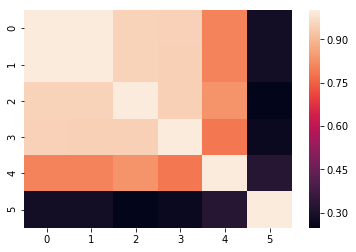

In [162]:
sns.heatmap(cuz)

In [163]:
df_M[0]

array([[-0.03543467, -0.00492884,  0.00186197],
       [ 0.00131354, -0.00829123, -0.0032745 ]])

In [164]:
comb = np.concatenate( (dg_M[:,:,list(range(20))], df_M), axis = 2)

In [165]:
cuz = get_cosines(np.swapaxes(comb, 1,2))

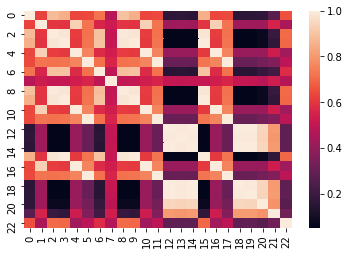

In [166]:
sns.heatmap(cuz)

In [167]:
get_atoms_4(9, ii, jj)

(array([[2, 0, 1, 5],
        [3, 0, 1, 5],
        [4, 0, 1, 5],
        [2, 0, 1, 6],
        [3, 0, 1, 6],
        [4, 0, 1, 6],
        [2, 0, 1, 7],
        [3, 0, 1, 7],
        [4, 0, 1, 7],
        [1, 0, 2, 8],
        [3, 0, 2, 8],
        [4, 0, 2, 8]]), 12)

In [186]:
atoms4 = get_all_atoms_4(9)[0]

In [187]:
atoms4[174]

array([0, 2, 4, 8])

In [188]:
atoms4[175]

array([2, 0, 4, 8])

In [189]:
atoms4[176]

array([8, 2, 0, 4])

In [180]:
for i in range(756):
    b = atoms4[i]
    b.sort()
    if (b == [0,2,4,8]).all():
        print(i)

174
175
176


In [208]:
for i in range(756):
    b = atoms4[i].copy()
    b.sort()
    if (b == [0,1,2,5]).all():
        print(i)

12
13
14


In [ ]:
#2, 0, 1, 5]

In [209]:
atoms4[14]

array([5, 1, 0, 2])

In [190]:
comb = np.concatenate( (dg_M[:,:,[14, 187, 740, 176]], df_M), axis = 2)

In [191]:
cuz = get_cosines(np.swapaxes(comb, 1,2))

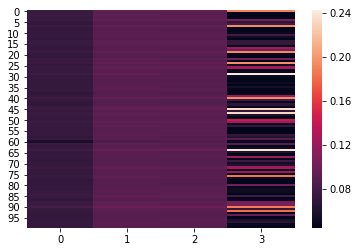

In [210]:
sns.heatmap(np.linalg.norm(dg_M[:,:,[14, 187, 740, 176]], axis = 1))

In [225]:
np.linalg.norm(dg_M[:,:,[187]])**2

0.8288723788942192

In [226]:
np.linalg.norm(dg_M[:,:,[14]])**2

0.5335117167561062

In [215]:
combbbb = np.concatenate((dg_M[:,:,176:177], df_M[:,:,2:3]) ,axis = 2)

In [217]:

def cosine_similarity(a, b):
    output = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return (output)

In [218]:
cs = np.zeros(100)
for i in range(100):
    cs[i] = cosine_similarity(dg_M[i,: , 176] , df_M[i,: , 2] )

(array([57., 14.,  6.,  7.,  4.,  0.,  1.,  7.,  0.,  4.]),
 array([0.04462898, 0.06439358, 0.08415818, 0.10392277, 0.12368737,
        0.14345197, 0.16321657, 0.18298116, 0.20274576, 0.22251036,
        0.24227495]),
 <a list of 10 Patch objects>)

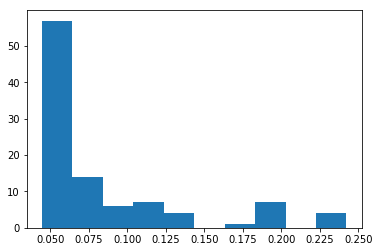

In [223]:
plt.hist(np.linalg.norm(dg_M[:,:,[14, 187, 740, 176]], axis = 1)[:,3])

(array([38.,  4.,  7.,  6.,  3.,  2.,  1.,  3.,  2., 34.]),
 array([-9.99638234e-01, -7.99733572e-01, -5.99828910e-01, -3.99924247e-01,
        -2.00019585e-01, -1.14922468e-04,  1.99789740e-01,  3.99694402e-01,
         5.99599065e-01,  7.99503727e-01,  9.99408389e-01]),
 <a list of 10 Patch objects>)

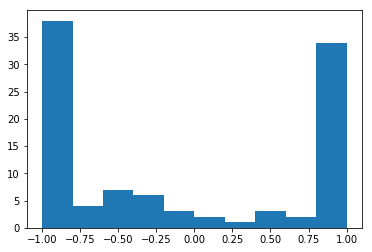

In [220]:
plt.hist(cs)

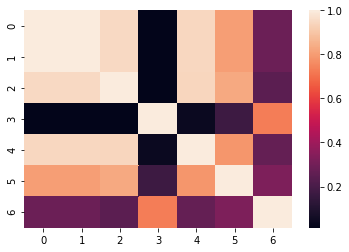

In [192]:
sns.heatmap(cuz)

In [193]:
GGLsmall2 = GradientGroupLasso(dg_M[:,:,[14, 187, 740, 176]], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLsmall2.fit()

0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

lr 10.0
738
lr 10.0
739
lr 10.0
740
lr 10.0
741
lr 10.0
742
lr 10.0
743
lr 10.0
744
lr 10.0
745
lr 10.0
746
lr 10.0
747
lr 10.0
748
lr 10.0
749
lr 10.0
750
lr 10.0
751
lr 10.0
752
lr 10.0
753
lr 10.0
754
lr 10.0
755
lr 10.0
756
lr 10.0
757
lr 10.0
758
lr 10.0
759
lr 10.0
760
lr 10.0
761
lr 10.0
762
lr 10.0
763
lr 10.0
764
lr 10.0
765
lr 10.0
766
lr 10.0
767
lr 10.0
768
lr 10.0
769
lr 10.0
770
lr 10.0
771
lr 10.0
772
lr 10.0
773
lr 10.0
774
lr 10.0
775
lr 10.0
776
lr 10.0
777
lr 10.0
778
lr 10.0
779
lr 10.0
780
lr 10.0
781
lr 10.0
782
lr 10.0
783
lr 10.0
784
lr 10.0
785
lr 10.0
786
lr 10.0
787
lr 10.0
788
lr 10.0
789
lr 10.0
790
lr 10.0
791
lr 10.0
792
lr 10.0
793
lr 10.0
794
lr 10.0
795
lr 10.0
796
lr 10.0
797
lr 10.0
798
lr 10.0
799
lr 10.0
800
lr 10.0
801
lr 10.0
802
lr 10.0
803
lr 10.0
804
lr 10.0
805
lr 10.0
806
lr 10.0
807
lr 10.0
808
lr 10.0
809
lr 10.0
810
lr 10.0
811
lr 10.0
812
lr 10.0
813
lr 10.0
814
lr 10.0
815
lr 10.0
816
lr 10.0
817
lr 10.0
818
lr 10.0
819
lr 10.0
820
lr 1

lr 3.637978807091713e-11
1178
lr 3.637978807091713e-11
1179
lr 3.637978807091713e-11
1180
lr 3.637978807091713e-11
1181
lr 3.637978807091713e-11
1182
lr 3.637978807091713e-11
1183
lr 3.637978807091713e-11
1184
lr 3.637978807091713e-11
1185
lr 3.637978807091713e-11
1186
lr 3.637978807091713e-11
1187
lr 3.637978807091713e-11
1188
lr 3.637978807091713e-11
1189
lr 3.637978807091713e-11
1190
lr 3.637978807091713e-11
1191
lr 3.637978807091713e-11
1192
lr 3.637978807091713e-11
1193
lr 3.637978807091713e-11
1194
lr 3.637978807091713e-11
1195
lr 3.637978807091713e-11
1196
lr 3.637978807091713e-11
1197
lr 3.637978807091713e-11
1198
lr 3.637978807091713e-11
1199
lr 3.637978807091713e-11
1200
lr 3.637978807091713e-11
1201
lr 3.637978807091713e-11
1202
lr 3.637978807091713e-11
1203
lr 3.637978807091713e-11
1204
lr 3.637978807091713e-11
1205
lr 3.637978807091713e-11
1206
lr 3.637978807091713e-11
1207
lr 3.637978807091713e-11
1208
lr 3.637978807091713e-11
1209
lr 3.637978807091713e-11
1210
lr 3.63797

lr 2.2737367544323206e-12
1527
lr 2.2737367544323206e-12
1528
lr 2.2737367544323206e-12
1529
lr 2.2737367544323206e-12
1530
lr 2.2737367544323206e-12
1531
lr 2.2737367544323206e-12
1532
lr 2.2737367544323206e-12
1533
lr 2.2737367544323206e-12
1534
lr 2.2737367544323206e-12
1535
lr 2.2737367544323206e-12
1536
lr 2.2737367544323206e-12
1537
lr 2.2737367544323206e-12
1538
lr 2.2737367544323206e-12
1539
lr 2.2737367544323206e-12
1540
lr 2.2737367544323206e-12
1541
lr 2.2737367544323206e-12
1542
lr 2.2737367544323206e-12
1543
lr 2.2737367544323206e-12
1544
lr 2.2737367544323206e-12
1545
lr 2.2737367544323206e-12
1546
lr 2.2737367544323206e-12
1547
lr 2.2737367544323206e-12
1548
lr 2.2737367544323206e-12
1549
lr 2.2737367544323206e-12
1550
lr 2.2737367544323206e-12
1551
lr 2.2737367544323206e-12
1552
lr 2.2737367544323206e-12
1553
lr 2.2737367544323206e-12
1554
lr 2.2737367544323206e-12
1555
lr 2.2737367544323206e-12
1556
lr 2.2737367544323206e-12
1557
lr 2.2737367544323206e-12
1558
lr 2.273

lr 1.1368683772161603e-12
1884
lr 1.1368683772161603e-12
1885
lr 1.1368683772161603e-12
1886
lr 1.1368683772161603e-12
1887
lr 1.1368683772161603e-12
1888
lr 1.1368683772161603e-12
1889
lr 1.1368683772161603e-12
1890
lr 1.1368683772161603e-12
1891
lr 1.1368683772161603e-12
1892
lr 1.1368683772161603e-12
1893
lr 1.1368683772161603e-12
1894
lr 1.1368683772161603e-12
1895
lr 1.1368683772161603e-12
1896
lr 1.1368683772161603e-12
1897
lr 1.1368683772161603e-12
1898
lr 1.1368683772161603e-12
1899
lr 1.1368683772161603e-12
1900
lr 1.1368683772161603e-12
1901
lr 1.1368683772161603e-12
1902
lr 1.1368683772161603e-12
1903
lr 1.1368683772161603e-12
1904
lr 1.1368683772161603e-12
1905
lr 1.1368683772161603e-12
1906
lr 1.1368683772161603e-12
1907
lr 1.1368683772161603e-12
1908
lr 1.1368683772161603e-12
1909
lr 1.1368683772161603e-12
1910
lr 1.1368683772161603e-12
1911
lr 1.1368683772161603e-12
1912
lr 1.1368683772161603e-12
1913
lr 1.1368683772161603e-12
1914
lr 1.1368683772161603e-12
1915
lr 1.136

lr 5.684341886080801e-13
2233
lr 5.684341886080801e-13
2234
lr 5.684341886080801e-13
2235
lr 5.684341886080801e-13
2236
lr 5.684341886080801e-13
2237
lr 5.684341886080801e-13
2238
lr 5.684341886080801e-13
2239
lr 5.684341886080801e-13
2240
lr 5.684341886080801e-13
2241
lr 5.684341886080801e-13
2242
lr 5.684341886080801e-13
2243
lr 5.684341886080801e-13
2244
lr 5.684341886080801e-13
2245
lr 5.684341886080801e-13
2246
lr 5.684341886080801e-13
2247
lr 5.684341886080801e-13
2248
lr 5.684341886080801e-13
2249
lr 5.684341886080801e-13
2250
lr 5.684341886080801e-13
2251
lr 5.684341886080801e-13
2252
lr 5.684341886080801e-13
2253
lr 5.684341886080801e-13
2254
lr 5.684341886080801e-13
2255
lr 5.684341886080801e-13
2256
lr 5.684341886080801e-13
2257
lr 5.684341886080801e-13
2258
lr 5.684341886080801e-13
2259
lr 5.684341886080801e-13
2260
lr 5.684341886080801e-13
2261
lr 5.684341886080801e-13
2262
lr 5.684341886080801e-13
2263
lr 5.684341886080801e-13
2264
lr 5.684341886080801e-13
2265
lr 5.68434

lr 5.684341886080801e-13
2580
lr 5.684341886080801e-13
2581
lr 5.684341886080801e-13
2582
lr 5.684341886080801e-13
2583
lr 5.684341886080801e-13
2584
lr 5.684341886080801e-13
2585
lr 5.684341886080801e-13
2586
lr 5.684341886080801e-13
2587
lr 5.684341886080801e-13
2588
lr 5.684341886080801e-13
2589
lr 5.684341886080801e-13
2590
lr 5.684341886080801e-13
2591
lr 5.684341886080801e-13
2592
lr 5.684341886080801e-13
2593
lr 5.684341886080801e-13
2594
lr 5.684341886080801e-13
2595
lr 5.684341886080801e-13
2596
lr 5.684341886080801e-13
2597
lr 5.684341886080801e-13
2598
lr 5.684341886080801e-13
2599
lr 5.684341886080801e-13
2600
lr 5.684341886080801e-13
2601
lr 5.684341886080801e-13
2602
lr 5.684341886080801e-13
2603
lr 5.684341886080801e-13
2604
lr 5.684341886080801e-13
2605
lr 5.684341886080801e-13
2606
lr 5.684341886080801e-13
2607
lr 5.684341886080801e-13
2608
lr 5.684341886080801e-13
2609
lr 5.684341886080801e-13
2610
lr 5.684341886080801e-13
2611
lr 5.684341886080801e-13
2612
lr 5.68434

In [194]:
np.where((np.linalg.norm(GGLsmall2.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)

(array([1, 2]),)

In [196]:
GGLsmall2 = GradientGroupLasso(dg_M[:,:,[187, 740, 176]], df_M, np.asarray([0.03651740006917935]), reg_l2, 2916,learning_rate, tol, beta0_npm= None)
GGLsmall2.fit()

0
lr 10.0
1
lr 10.0
2
lr 10.0
3
lr 10.0
4
lr 10.0
5
lr 10.0
6
lr 10.0
7
lr 10.0
8
lr 10.0
9
lr 10.0
10
lr 10.0
11
lr 10.0
12
lr 10.0
13
lr 10.0
14
lr 10.0
15
lr 10.0
16
lr 10.0
17
lr 10.0
18
lr 10.0
19
lr 10.0
20
lr 10.0
21
lr 10.0
22
lr 10.0
23
lr 10.0
24
lr 10.0
25
lr 10.0
26
lr 10.0
27
lr 10.0
28
lr 10.0
29
lr 10.0
30
lr 10.0
31
lr 10.0
32
lr 10.0
33
lr 10.0
34
lr 10.0
35
lr 10.0
36
lr 10.0
37
lr 10.0
38
lr 10.0
39
lr 10.0
40
lr 10.0
41
lr 10.0
42
lr 10.0
43
lr 10.0
44
lr 10.0
45
lr 10.0
46
lr 10.0
47
lr 10.0
48
lr 10.0
49
lr 10.0
50
lr 10.0
51
lr 10.0
52
lr 10.0
53
lr 10.0
54
lr 10.0
55
lr 10.0
56
lr 10.0
57
lr 10.0
58
lr 10.0
59
lr 10.0
60
lr 10.0
61
lr 10.0
62
lr 10.0
63
lr 10.0
64
lr 10.0
65
lr 10.0
66
lr 10.0
67
lr 10.0
68
lr 10.0
69
lr 10.0
70
lr 10.0
71
lr 10.0
72
lr 10.0
73
lr 10.0
74
lr 10.0
75
lr 10.0
76
lr 10.0
77
lr 10.0
78
lr 10.0
79
lr 10.0
80
lr 10.0
81
lr 10.0
82
lr 10.0
83
lr 10.0
84
lr 10.0
85
lr 10.0
86
lr 10.0
87
lr 10.0
88
lr 10.0
89
lr 10.0
90
lr 10.0
91
lr 10.

lr 10.0
817
lr 10.0
818
lr 10.0
819
lr 10.0
820
lr 10.0
821
lr 10.0
822
lr 10.0
823
lr 10.0
824
lr 10.0
825
lr 10.0
826
lr 10.0
827
lr 10.0
828
lr 10.0
829
lr 10.0
830
lr 10.0
831
lr 10.0
832
lr 10.0
833
lr 10.0
834
lr 10.0
835
lr 10.0
836
lr 10.0
837
lr 10.0
838
lr 10.0
839
lr 10.0
840
lr 10.0
841
lr 10.0
842
lr 10.0
843
lr 10.0
844
lr 10.0
845
lr 10.0
846
lr 10.0
847
lr 10.0
848
lr 10.0
849
lr 10.0
850
lr 10.0
851
lr 10.0
852
lr 10.0
853
lr 10.0
854
lr 10.0
855
lr 10.0
856
lr 10.0
857
lr 10.0
858
lr 10.0
859
lr 10.0
860
lr 10.0
861
lr 10.0
862
lr 10.0
863
lr 10.0
864
lr 10.0
865
lr 10.0
866
lr 10.0
867
lr 10.0
868
lr 10.0
869
lr 10.0
870
lr 10.0
871
lr 10.0
872
lr 10.0
873
lr 10.0
874
lr 10.0
875
lr 10.0
876
lr 10.0
877
lr 10.0
878
lr 10.0
879
lr 10.0
880
lr 10.0
881
lr 10.0
882
lr 10.0
883
lr 10.0
884
lr 10.0
885
lr 10.0
886
lr 10.0
887
lr 10.0
888
lr 10.0
889
lr 10.0
890
lr 10.0
891
lr 10.0
892
lr 10.0
893
lr 10.0
894
lr 10.0
895
lr 10.0
896
lr 10.0
897
lr 10.0
898
lr 10.0
899
lr 1

In [197]:
np.where((np.linalg.norm(GGLsmall2.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)

(array([0, 1]),)

In [203]:
GGLsmall2 = GradientGroupLasso(dg_M[:10,:,[187, 740, 176]], df_M[:10], np.asarray([0.006651740006917935]), reg_l2, 2916,.1, tol, beta0_npm= None)
GGLsmall2.fit()

0
lr 0.1
1
lr 0.1
2
lr 0.1
3
lr 0.1
4
lr 0.1
5
lr 0.1
6
lr 0.1
7
lr 0.1
8
lr 0.1
9
lr 0.1
10
lr 0.1
11
lr 0.1
12
lr 0.1
13
lr 0.1
14
lr 0.1
15
lr 0.1
16
lr 0.1
17
lr 0.1
18
lr 0.1
19
lr 0.1
20
lr 0.1
21
lr 0.1
22
lr 0.1
23
lr 0.1
24
lr 0.1
25
lr 0.1
26
lr 0.1
27
lr 0.1
28
lr 0.1
29
lr 0.1
30
lr 0.1
31
lr 0.1
32
lr 0.1
33
lr 0.1
34
lr 0.1
35
lr 0.1
36
lr 0.1
37
lr 0.1
38
lr 0.1
39
lr 0.1
40
lr 0.1
41
lr 0.1
42
lr 0.1
43
lr 0.1
44
lr 0.1
45
lr 0.1
46
lr 0.1
47
lr 0.1
48
lr 0.1
49
lr 0.1
50
lr 0.1
51
lr 0.1
52
lr 0.1
53
lr 0.1
54
lr 0.1
55
lr 0.1
56
lr 0.1
57
lr 0.1
58
lr 0.1
59
lr 0.1
60
lr 0.1
61
lr 0.1
62
lr 0.1
63
lr 0.1
64
lr 0.1
65
lr 0.1
66
lr 0.1
67
lr 0.1
68
lr 0.1
69
lr 0.1
70
lr 0.1
71
lr 0.1
72
lr 0.1
73
lr 0.1
74
lr 0.1
75
lr 0.1
76
lr 0.1
77
lr 0.1
78
lr 0.1
79
lr 0.1
80
lr 0.1
81
lr 0.1
82
lr 0.1
83
lr 0.1
84
lr 0.1
85
lr 0.1
86
lr 0.1
87
lr 0.1
88
lr 0.1
89
lr 0.1
90
lr 0.1
91
lr 0.1
92
lr 0.1
93
lr 0.1
94
lr 0.1
95
lr 0.1
96
lr 0.1
97
lr 0.1
98
lr 0.1
99
lr 0.1
100
lr 0.1

lr 0.1
899
lr 0.1
900
lr 0.1
901
lr 0.1
902
lr 0.1
903
lr 0.1
904
lr 0.1
905
lr 0.1
906
lr 0.1
907
lr 0.1
908
lr 0.1
909
lr 0.1
910
lr 0.1
911
lr 0.1
912
lr 0.1
913
lr 0.1
914
lr 0.1
915
lr 0.1
916
lr 0.1
917
lr 0.1
918
lr 0.1
919
lr 0.1
920
lr 0.1
921
lr 0.1
922
lr 0.1
923
lr 0.1
924
lr 0.1
925
lr 0.1
926
lr 0.1
927
lr 0.1
928
lr 0.1
929
lr 0.1
930
lr 0.1
931
lr 0.1
932
lr 0.1
933
lr 0.1
934
lr 0.1
935
lr 0.1
936
lr 0.1
937
lr 0.1
938
lr 0.1
939
lr 0.1
940
lr 0.1
941
lr 0.1
942
lr 0.1
943
lr 0.1
944
lr 0.1
945
lr 0.1
946
lr 0.1
947
lr 0.1
948
lr 0.1
949
lr 0.1
950
lr 0.1
951
lr 0.1
952
lr 0.1
953
lr 0.1
954
lr 0.1
955
lr 0.1
956
lr 0.1
957
lr 0.1
958
lr 0.1
959
lr 0.1
960
lr 0.1
961
lr 0.1
962
lr 0.1
963
lr 0.1
964
lr 0.1
965
lr 0.1
966
lr 0.1
967
lr 0.1
968
lr 0.1
969
lr 0.1
970
lr 0.1
971
lr 0.1
972
lr 0.1
973
lr 0.1
974
lr 0.1
975
lr 0.1
976
lr 0.1
977
lr 0.1
978
lr 0.1
979
lr 0.1
980
lr 0.1
981
lr 0.1
982
lr 0.1
983
lr 0.1
984
lr 0.1
985
lr 0.1
986
lr 0.1
987
lr 0.1
988
lr 0.1
989

1697
lr 0.1
1698
lr 0.1
1699
lr 0.1
1700
lr 0.1
1701
lr 0.1
1702
lr 0.1
1703
lr 0.1
1704
lr 0.1
1705
lr 0.1
1706
lr 0.1
1707
lr 0.1
1708
lr 0.1
1709
lr 0.1
1710
lr 0.1
1711
lr 0.1
1712
lr 0.1
1713
lr 0.1
1714
lr 0.1
1715
lr 0.1
1716
lr 0.1
1717
lr 0.1
1718
lr 0.1
1719
lr 0.1
1720
lr 0.1
1721
lr 0.1
1722
lr 0.1
1723
lr 0.1
1724
lr 0.1
1725
lr 0.1
1726
lr 0.1
1727
lr 0.1
1728
lr 0.1
1729
lr 0.1
1730
lr 0.1
1731
lr 0.1
1732
lr 0.1
1733
lr 0.1
1734
lr 0.1
1735
lr 0.1
1736
lr 0.1
1737
lr 0.1
1738
lr 0.1
1739
lr 0.1
1740
lr 0.1
1741
lr 0.1
1742
lr 0.1
1743
lr 0.1
1744
lr 0.1
1745
lr 0.1
1746
lr 0.1
1747
lr 0.1
1748
lr 0.1
1749
lr 0.1
1750
lr 0.1
1751
lr 0.1
1752
lr 0.1
1753
lr 0.1
1754
lr 0.1
1755
lr 0.1
1756
lr 0.1
1757
lr 0.1
1758
lr 0.1
1759
lr 0.1
1760
lr 0.1
1761
lr 0.1
1762
lr 0.1
1763
lr 0.1
1764
lr 0.1
1765
lr 0.1
1766
lr 0.1
1767
lr 0.1
1768
lr 0.1
1769
lr 0.1
1770
lr 0.1
1771
lr 0.1
1772
lr 0.1
1773
lr 0.1
1774
lr 0.1
1775
lr 0.1
1776
lr 0.1
1777
lr 0.1
1778
lr 0.1
1779
lr 0.1
1780

lr 0.1
2493
lr 0.1
2494
lr 0.1
2495
lr 0.1
2496
lr 0.1
2497
lr 0.1
2498
lr 0.1
2499
lr 0.1
2500
lr 0.1
2501
lr 0.1
2502
lr 0.1
2503
lr 0.1
2504
lr 0.1
2505
lr 0.1
2506
lr 0.1
2507
lr 0.1
2508
lr 0.1
2509
lr 0.1
2510
lr 0.1
2511
lr 0.1
2512
lr 0.1
2513
lr 0.1
2514
lr 0.1
2515
lr 0.1
2516
lr 0.1
2517
lr 0.1
2518
lr 0.1
2519
lr 0.1
2520
lr 0.1
2521
lr 0.1
2522
lr 0.1
2523
lr 0.1
2524
lr 0.1
2525
lr 0.1
2526
lr 0.1
2527
lr 0.1
2528
lr 0.1
2529
lr 0.1
2530
lr 0.1
2531
lr 0.1
2532
lr 0.1
2533
lr 0.1
2534
lr 0.1
2535
lr 0.1
2536
lr 0.1
2537
lr 0.1
2538
lr 0.1
2539
lr 0.1
2540
lr 0.1
2541
lr 0.1
2542
lr 0.1
2543
lr 0.1
2544
lr 0.1
2545
lr 0.1
2546
lr 0.1
2547
lr 0.1
2548
lr 0.1
2549
lr 0.1
2550
lr 0.1
2551
lr 0.1
2552
lr 0.1
2553
lr 0.1
2554
lr 0.1
2555
lr 0.1
2556
lr 0.1
2557
lr 0.1
2558
lr 0.1
2559
lr 0.1
2560
lr 0.1
2561
lr 0.1
2562
lr 0.1
2563
lr 0.1
2564
lr 0.1
2565
lr 0.1
2566
lr 0.1
2567
lr 0.1
2568
lr 0.1
2569
lr 0.1
2570
lr 0.1
2571
lr 0.1
2572
lr 0.1
2573
lr 0.1
2574
lr 0.1
2575
lr 0

In [204]:
np.where((np.linalg.norm(GGLsmall2.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1) != 0.)

(array([0, 1]),)

In [205]:
GGLsmall2 = GradientGroupLasso(dg_M[:10,:,[187, 740, 176]], df_M[:10], np.asarray([0.00001]), reg_l2, 2916,.1, tol, beta0_npm= None)
GGLsmall2.fit()

0
lr 0.1
1
lr 0.1
2
lr 0.1
3
lr 0.1
4
lr 0.1
5
lr 0.1
6
lr 0.1
7
lr 0.1
8
lr 0.1
9
lr 0.1
10
lr 0.1
11
lr 0.1
12
lr 0.1
13
lr 0.1
14
lr 0.1
15
lr 0.1
16
lr 0.1
17
lr 0.1
18
lr 0.1
19
lr 0.1
20
lr 0.1
21
lr 0.1
22
lr 0.1
23
lr 0.1
24
lr 0.1
25
lr 0.1
26
lr 0.1
27
lr 0.1
28
lr 0.1
29
lr 0.1
30
lr 0.1
31
lr 0.1
32
lr 0.1
33
lr 0.1
34
lr 0.1
35
lr 0.1
36
lr 0.1
37
lr 0.1
38
lr 0.1
39
lr 0.1
40
lr 0.1
41
lr 0.1
42
lr 0.1
43
lr 0.1
44
lr 0.1
45
lr 0.1
46
lr 0.1
47
lr 0.1
48
lr 0.1
49
lr 0.1
50
lr 0.1
51
lr 0.1
52
lr 0.1
53
lr 0.1
54
lr 0.1
55
lr 0.1
56
lr 0.1
57
lr 0.1
58
lr 0.1
59
lr 0.1
60
lr 0.1
61
lr 0.1
62
lr 0.1
63
lr 0.1
64
lr 0.1
65
lr 0.1
66
lr 0.1
67
lr 0.1
68
lr 0.1
69
lr 0.1
70
lr 0.1
71
lr 0.1
72
lr 0.1
73
lr 0.1
74
lr 0.1
75
lr 0.1
76
lr 0.1
77
lr 0.1
78
lr 0.1
79
lr 0.1
80
lr 0.1
81
lr 0.1
82
lr 0.1
83
lr 0.1
84
lr 0.1
85
lr 0.1
86
lr 0.1
87
lr 0.1
88
lr 0.1
89
lr 0.1
90
lr 0.1
91
lr 0.1
92
lr 0.1
93
lr 0.1
94
lr 0.1
95
lr 0.1
96
lr 0.1
97
lr 0.1
98
lr 0.1
99
lr 0.1
100
lr 0.1

lr 0.1
851
lr 0.1
852
lr 0.1
853
lr 0.1
854
lr 0.1
855
lr 0.1
856
lr 0.1
857
lr 0.1
858
lr 0.1
859
lr 0.1
860
lr 0.1
861
lr 0.1
862
lr 0.1
863
lr 0.1
864
lr 0.1
865
lr 0.1
866
lr 0.1
867
lr 0.1
868
lr 0.1
869
lr 0.1
870
lr 0.1
871
lr 0.1
872
lr 0.1
873
lr 0.1
874
lr 0.1
875
lr 0.1
876
lr 0.1
877
lr 0.1
878
lr 0.1
879
lr 0.1
880
lr 0.1
881
lr 0.1
882
lr 0.1
883
lr 0.1
884
lr 0.1
885
lr 0.1
886
lr 0.1
887
lr 0.1
888
lr 0.1
889
lr 0.1
890
lr 0.1
891
lr 0.1
892
lr 0.1
893
lr 0.1
894
lr 0.1
895
lr 0.1
896
lr 0.1
897
lr 0.1
898
lr 0.1
899
lr 0.1
900
lr 0.1
901
lr 0.1
902
lr 0.1
903
lr 0.1
904
lr 0.1
905
lr 0.1
906
lr 0.1
907
lr 0.1
908
lr 0.1
909
lr 0.1
910
lr 0.1
911
lr 0.1
912
lr 0.1
913
lr 0.1
914
lr 0.1
915
lr 0.1
916
lr 0.1
917
lr 0.1
918
lr 0.1
919
lr 0.1
920
lr 0.1
921
lr 0.1
922
lr 0.1
923
lr 0.1
924
lr 0.1
925
lr 0.1
926
lr 0.1
927
lr 0.1
928
lr 0.1
929
lr 0.1
930
lr 0.1
931
lr 0.1
932
lr 0.1
933
lr 0.1
934
lr 0.1
935
lr 0.1
936
lr 0.1
937
lr 0.1
938
lr 0.1
939
lr 0.1
940
lr 0.1
941

lr 0.1
1596
lr 0.1
1597
lr 0.1
1598
lr 0.1
1599
lr 0.1
1600
lr 0.1
1601
lr 0.1
1602
lr 0.1
1603
lr 0.1
1604
lr 0.1
1605
lr 0.1
1606
lr 0.1
1607
lr 0.1
1608
lr 0.1
1609
lr 0.1
1610
lr 0.1
1611
lr 0.1
1612
lr 0.1
1613
lr 0.1
1614
lr 0.1
1615
lr 0.1
1616
lr 0.1
1617
lr 0.1
1618
lr 0.1
1619
lr 0.1
1620
lr 0.1
1621
lr 0.1
1622
lr 0.1
1623
lr 0.1
1624
lr 0.1
1625
lr 0.1
1626
lr 0.1
1627
lr 0.1
1628
lr 0.1
1629
lr 0.1
1630
lr 0.1
1631
lr 0.1
1632
lr 0.1
1633
lr 0.1
1634
lr 0.1
1635
lr 0.1
1636
lr 0.1
1637
lr 0.1
1638
lr 0.1
1639
lr 0.1
1640
lr 0.1
1641
lr 0.1
1642
lr 0.1
1643
lr 0.1
1644
lr 0.1
1645
lr 0.1
1646
lr 0.1
1647
lr 0.1
1648
lr 0.1
1649
lr 0.1
1650
lr 0.1
1651
lr 0.1
1652
lr 0.1
1653
lr 0.1
1654
lr 0.1
1655
lr 0.1
1656
lr 0.1
1657
lr 0.1
1658
lr 0.1
1659
lr 0.1
1660
lr 0.1
1661
lr 0.1
1662
lr 0.1
1663
lr 0.1
1664
lr 0.1
1665
lr 0.1
1666
lr 0.1
1667
lr 0.1
1668
lr 0.1
1669
lr 0.1
1670
lr 0.1
1671
lr 0.1
1672
lr 0.1
1673
lr 0.1
1674
lr 0.1
1675
lr 0.1
1676
lr 0.1
1677
lr 0.1
1678
lr 0

2344
lr 0.1
2345
lr 0.1
2346
lr 0.1
2347
lr 0.1
2348
lr 0.1
2349
lr 0.1
2350
lr 0.1
2351
lr 0.1
2352
lr 0.1
2353
lr 0.1
2354
lr 0.1
2355
lr 0.1
2356
lr 0.1
2357
lr 0.1
2358
lr 0.1
2359
lr 0.1
2360
lr 0.1
2361
lr 0.1
2362
lr 0.1
2363
lr 0.1
2364
lr 0.1
2365
lr 0.1
2366
lr 0.1
2367
lr 0.1
2368
lr 0.1
2369
lr 0.1
2370
lr 0.1
2371
lr 0.1
2372
lr 0.1
2373
lr 0.1
2374
lr 0.1
2375
lr 0.1
2376
lr 0.1
2377
lr 0.1
2378
lr 0.1
2379
lr 0.1
2380
lr 0.1
2381
lr 0.1
2382
lr 0.1
2383
lr 0.1
2384
lr 0.1
2385
lr 0.1
2386
lr 0.1
2387
lr 0.1
2388
lr 0.1
2389
lr 0.1
2390
lr 0.1
2391
lr 0.1
2392
lr 0.1
2393
lr 0.1
2394
lr 0.1
2395
lr 0.1
2396
lr 0.1
2397
lr 0.1
2398
lr 0.1
2399
lr 0.1
2400
lr 0.1
2401
lr 0.1
2402
lr 0.1
2403
lr 0.1
2404
lr 0.1
2405
lr 0.1
2406
lr 0.1
2407
lr 0.1
2408
lr 0.1
2409
lr 0.1
2410
lr 0.1
2411
lr 0.1
2412
lr 0.1
2413
lr 0.1
2414
lr 0.1
2415
lr 0.1
2416
lr 0.1
2417
lr 0.1
2418
lr 0.1
2419
lr 0.1
2420
lr 0.1
2421
lr 0.1
2422
lr 0.1
2423
lr 0.1
2424
lr 0.1
2425
lr 0.1
2426
lr 0.1
2427

In [207]:
(np.linalg.norm(GGLsmall2.fit_[-1]['beta'], axis = 0)**2).sum(axis = 1)

array([0.57371998, 0.57270154, 2.95521386])

In [ ]:
dnoise = 2
p  = 756

In [238]:
dg_M_sub = np.swapaxes(dg_M[:,:,[14, 187, 740, 176]],1,2)
p = 4
dnoise = 2

In [239]:
from itertools import combinations

In [240]:
        parameterizations_possible = np.asarray(list(combinations(range(p), dnoise)))
        nparameterizations_possible = parameterizations_possible.shape[0]
        supports_brute = {}
        penalties = np.zeros((nreps, nparameterizations_possible))
        ols_norm = np.zeros((nreps, p, p))
    
        brute_coeffs = np.zeros((nsel, nparameterizations_possible, experiment.dim, experiment.q))
        
        orthogonality = np.zeros((nsel, nparameterizations_possible))
        r = 0
        for i in range(nsel):
            print(i)
            for j in range(nparameterizations_possible):
                brute_coeffs[i, j] = np.linalg.lstsq(dg_M_sub[i, parameterizations_possible[j], :], df_M[i])[0]
                # orthogonality[i,j] = get_penalty(brute_coeffs[i,j])
        for j in range(nparameterizations_possible):
            penalties[r, j] = experiment.compute_penalty2(np.expand_dims(brute_coeffs[:, j], 0))
        for j in range(nparameterizations_possible):
            ols_norm[r, parameterizations_possible[j][0], parameterizations_possible[j][1]] = penalties[r, j]
            ols_norm[r, parameterizations_possible[j][1], parameterizations_possible[j][0]] = penalties[r, j]
        supports_brute[r] = parameterizations_possible[penalties[r, :].argmin()]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [241]:
supports_brute

{0: array([2, 3])}

In [236]:
nsel

100

In [237]:
dg_M.shape

(100, 2, 756)

In [242]:
atoms4[[14, 187, 740, 176]]

array([[5, 1, 0, 2],
       [2, 0, 5, 7],
       [8, 5, 4, 7],
       [8, 2, 0, 4]])